Validation set size: 218391
Negative (0): 109196 (50.00%)
Positive (1): 109195 (50.00%)


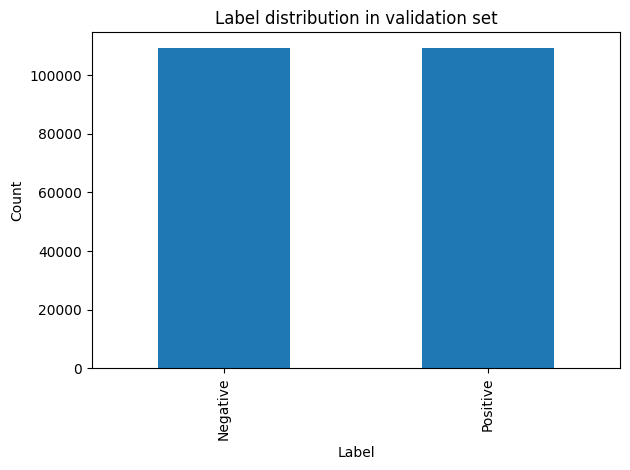

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

# 1. Φόρτωσε τα δεδομένα
path = r'D:\NLP\tfidf_xgboost\split_train_val\citation_pairs_split_train_val.csv'
df = pd.read_csv(path)

# 2. Φιλτράρισμα για το validation split
val = df[df['split'] == 'val']

# 3. Κατανομή θετικών/αρνητικών
counts = val['label'].value_counts().sort_index()
total = counts.sum()
print("Validation set size:", total)
print("Negative (0):", counts.get(0,0), f"({counts.get(0,0)/total:.2%})")
print("Positive (1):", counts.get(1,0), f"({counts.get(1,0)/total:.2%})")

# 4. Bar chart κατανομής
plt.figure()
counts.plot(kind='bar')
plt.xticks([0,1], ['Negative','Positive'])
plt.xlabel('Label')
plt.ylabel('Count')
plt.title('Label distribution in validation set')
plt.tight_layout()
plt.show()



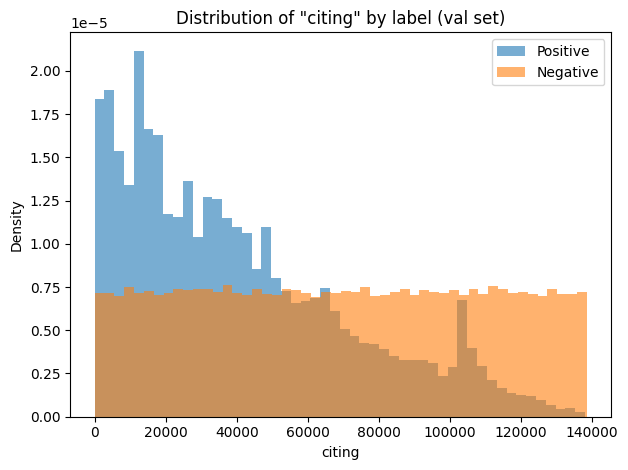

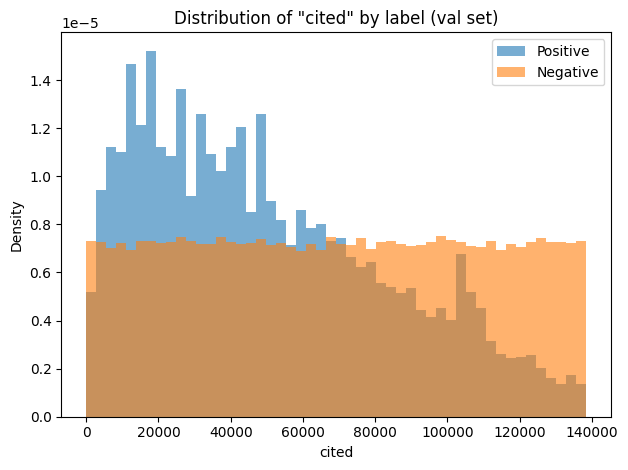

In [3]:
# 5. (Προαιρετικά) Αν έχεις αριθμητικά features στο ίδιο df:
#    π.χ. αν φόρτωσες μαζί και tfidf_similarity, pagerank κτλ.
num_cols = val.select_dtypes(include=['int64','float64']).columns.drop(['label'])
for col in num_cols:
    plt.figure()
    # θετικά
    pos = val[val['label'] == 1][col].dropna()
    # αρνητικά
    neg = val[val['label'] == 0][col].dropna()
    plt.hist(pos, bins=50, density=True, alpha=0.6, label='Positive')
    plt.hist(neg, bins=50, density=True, alpha=0.6, label='Negative')
    plt.xlabel(col)
    plt.ylabel('Density')
    plt.title(f'Distribution of "{col}" by label (val set)')
    plt.legend()
    plt.tight_layout()
    plt.show()


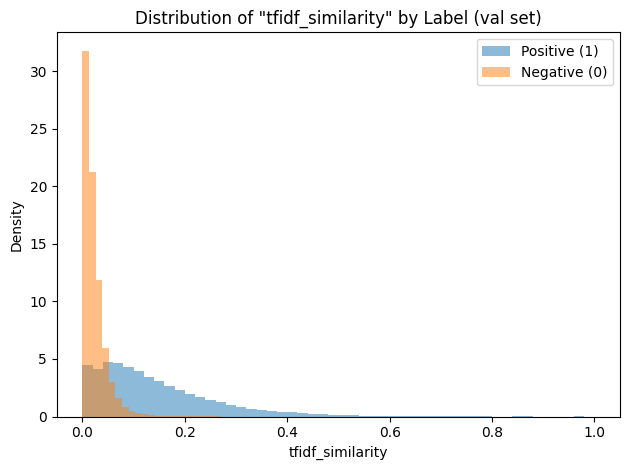

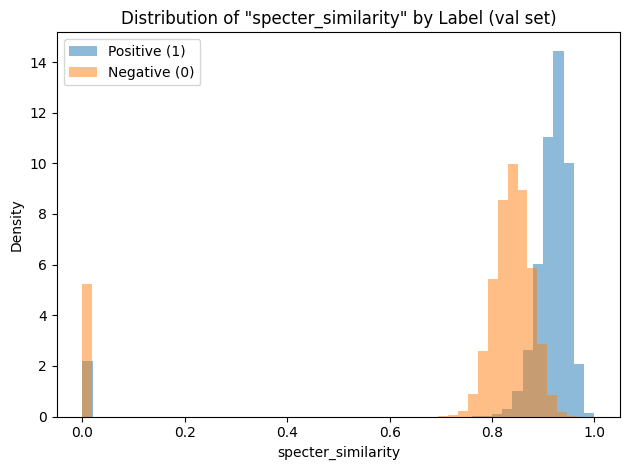

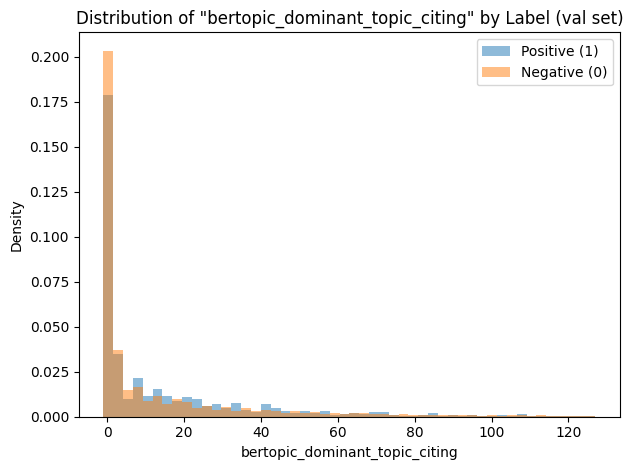

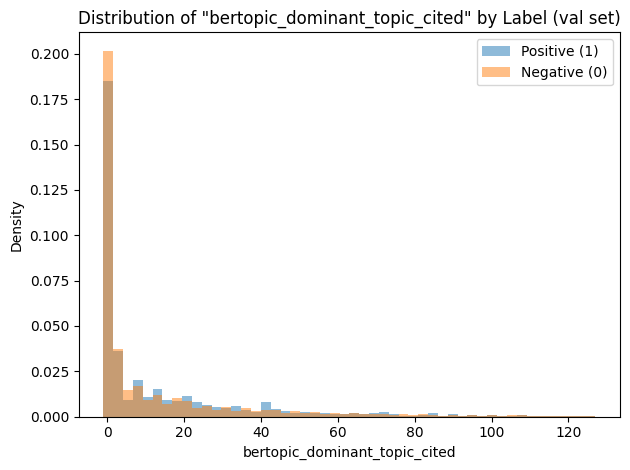

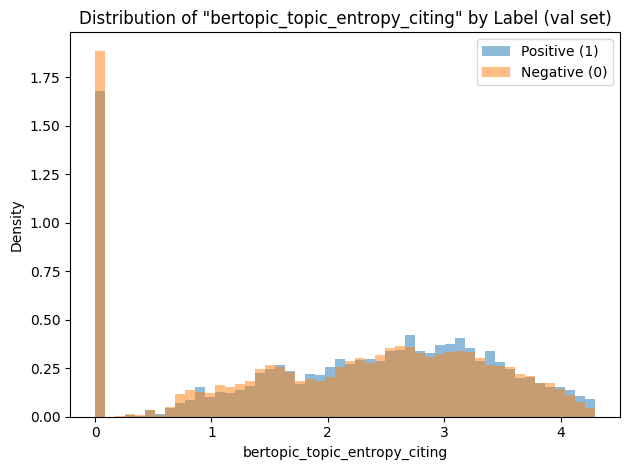

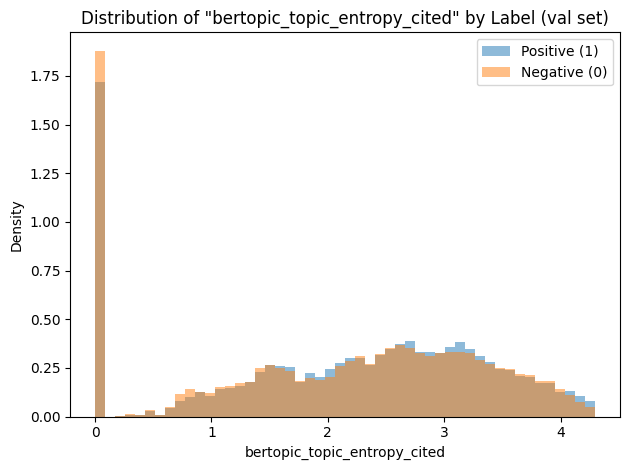

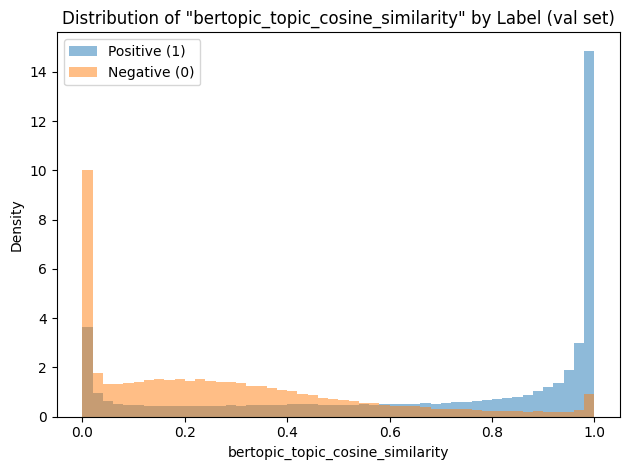

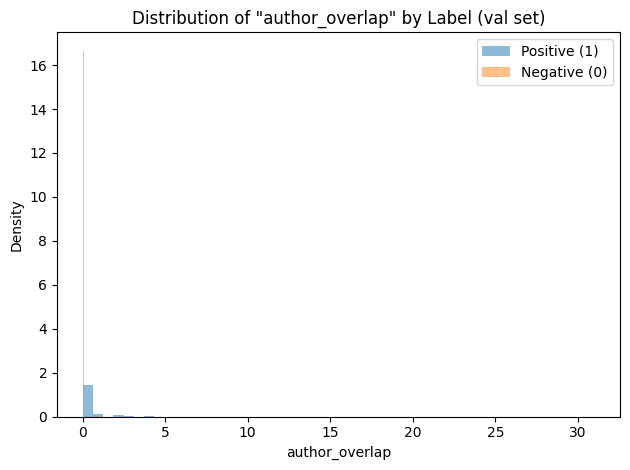

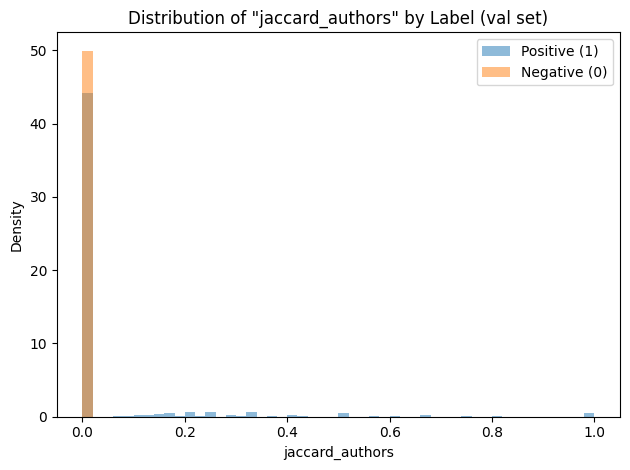

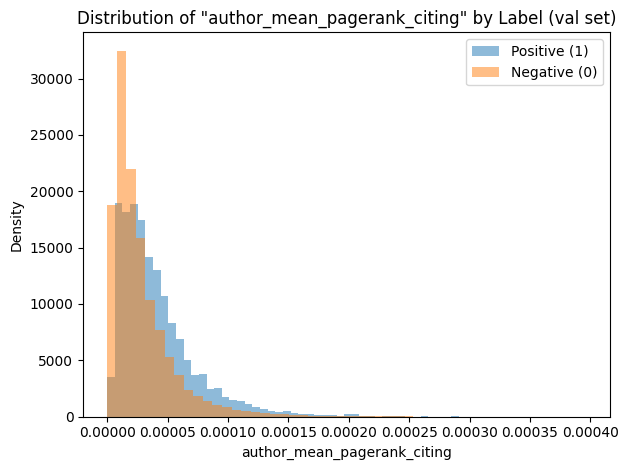

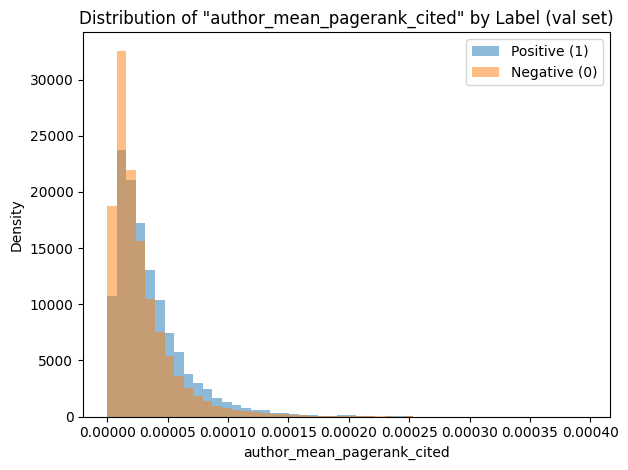

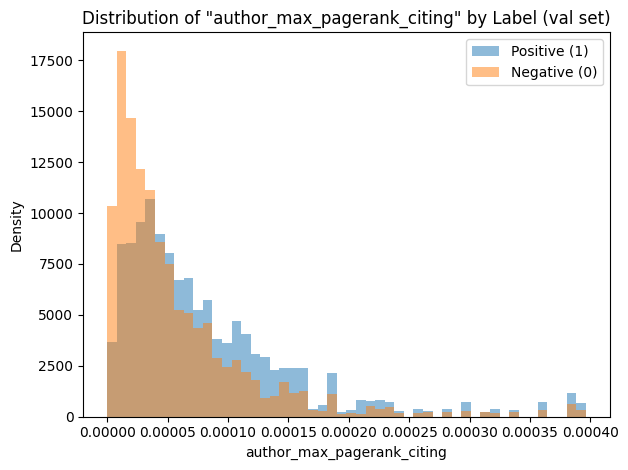

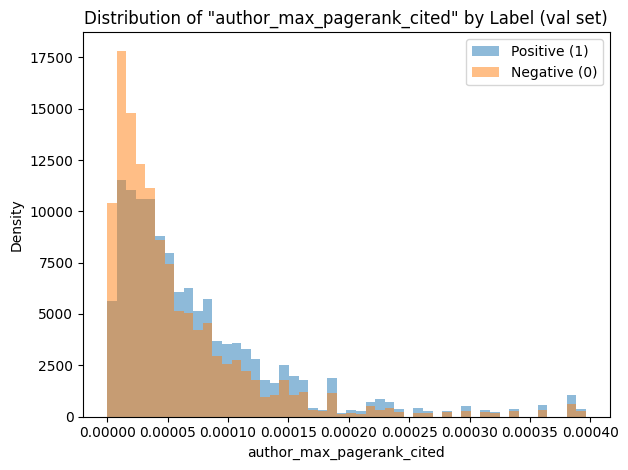

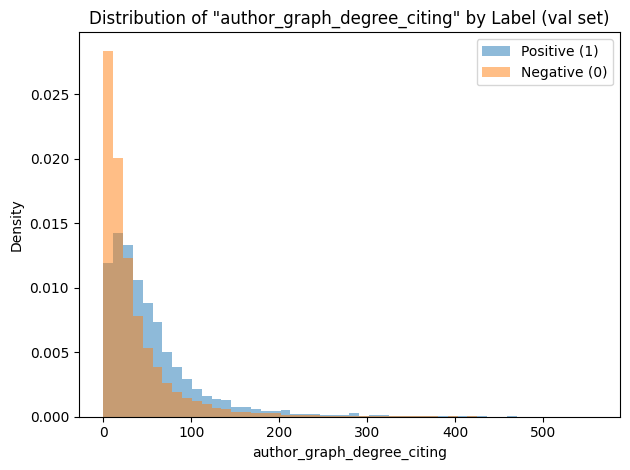

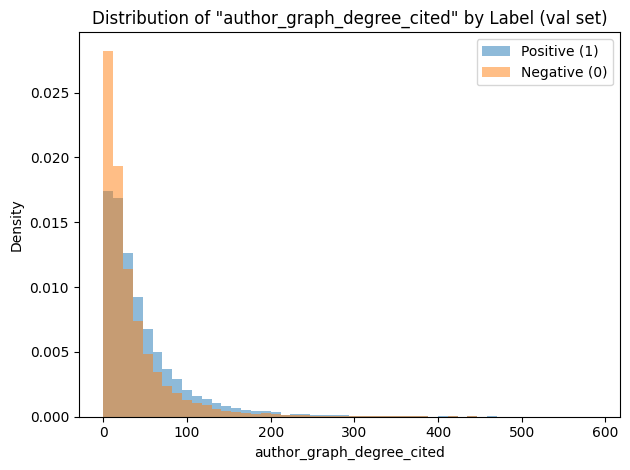

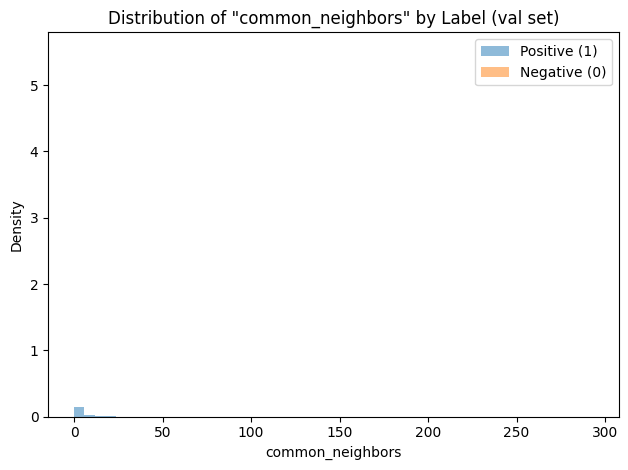

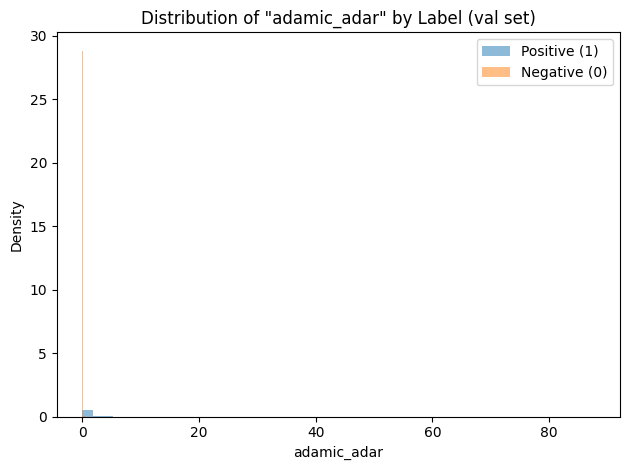

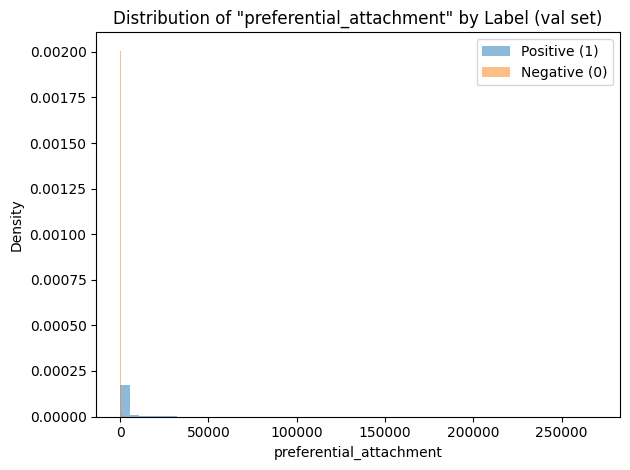

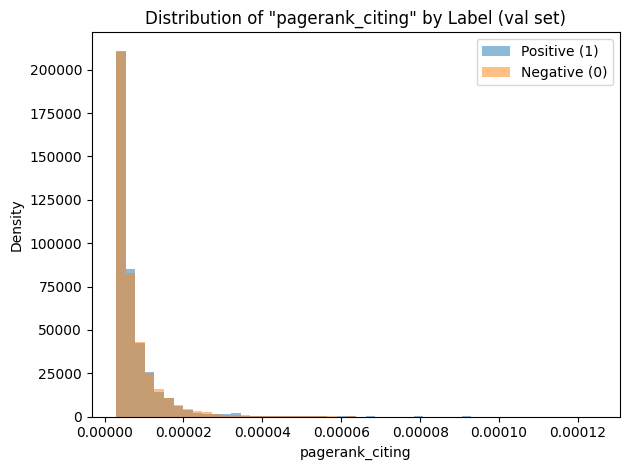

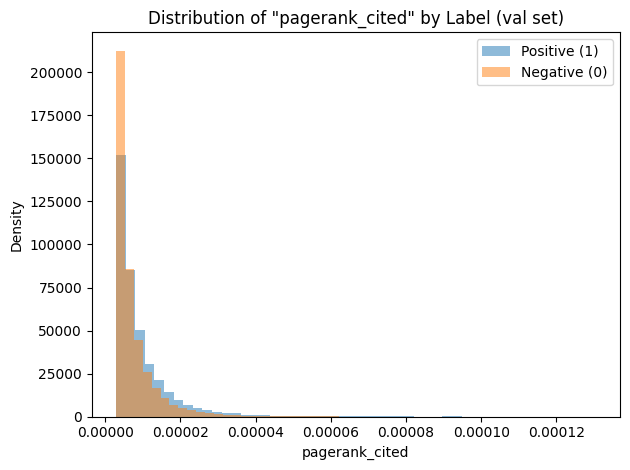

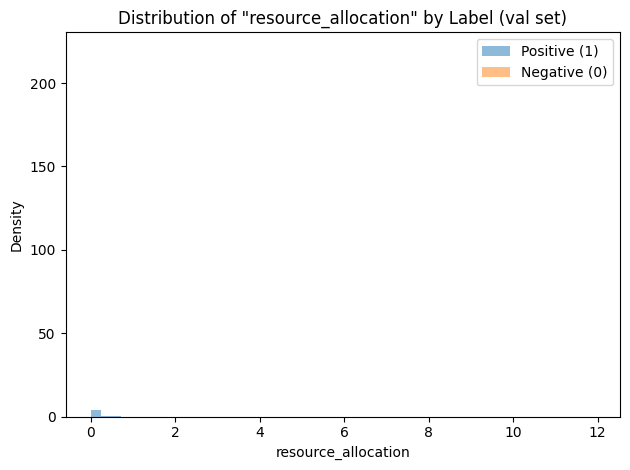

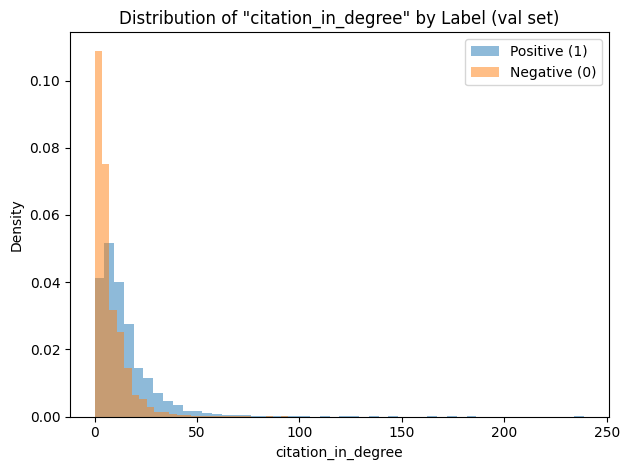

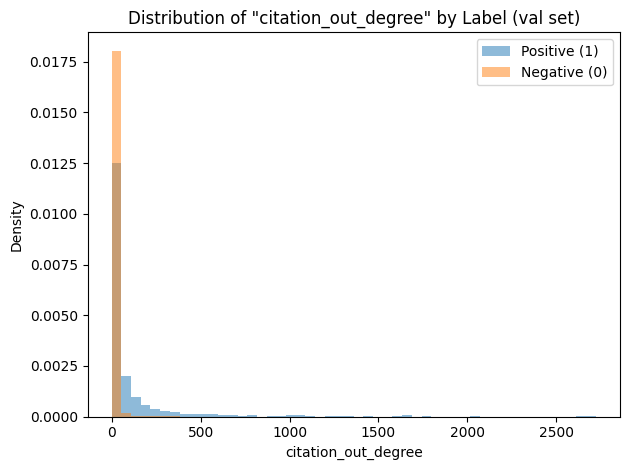

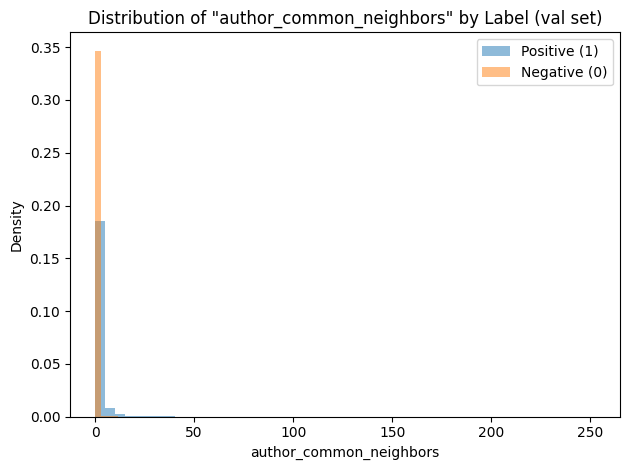

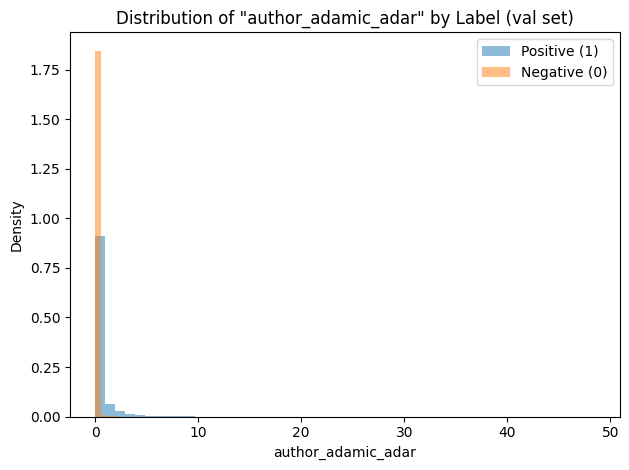

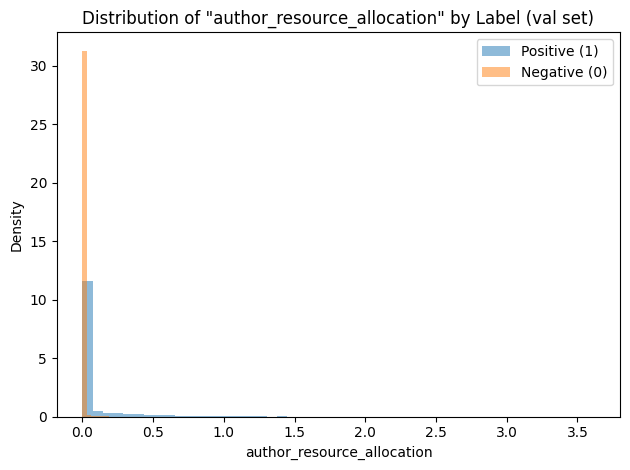

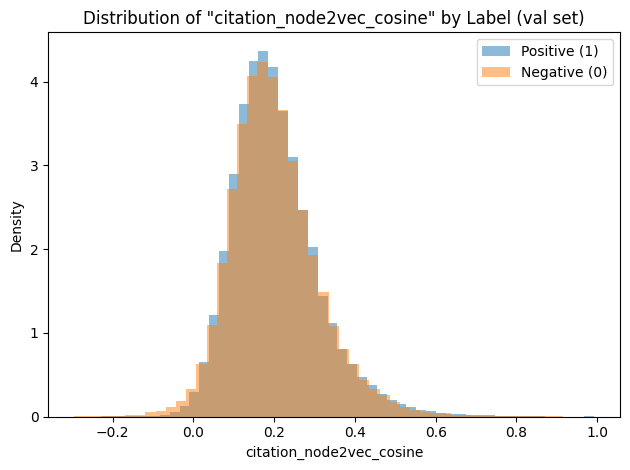

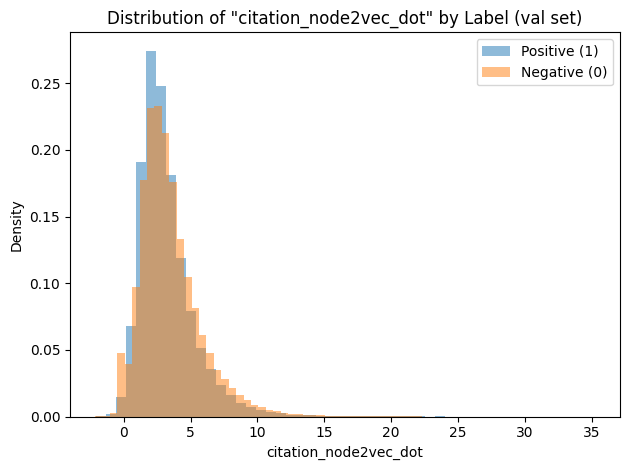

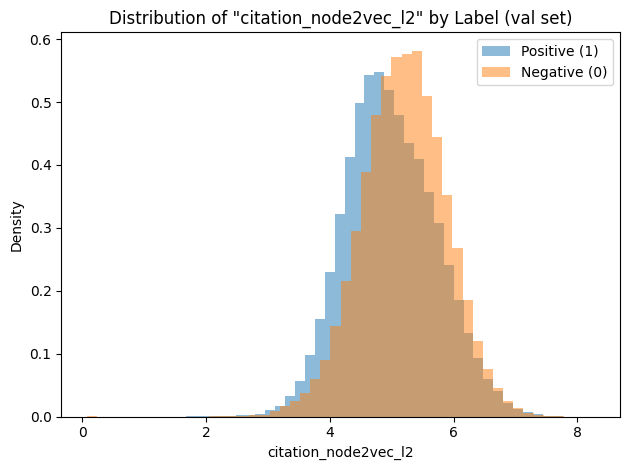

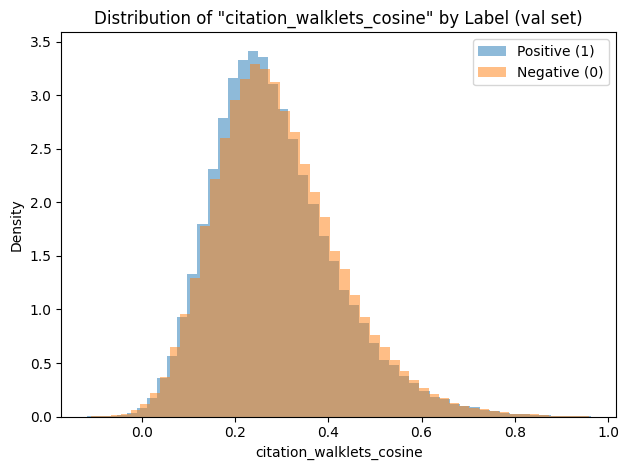

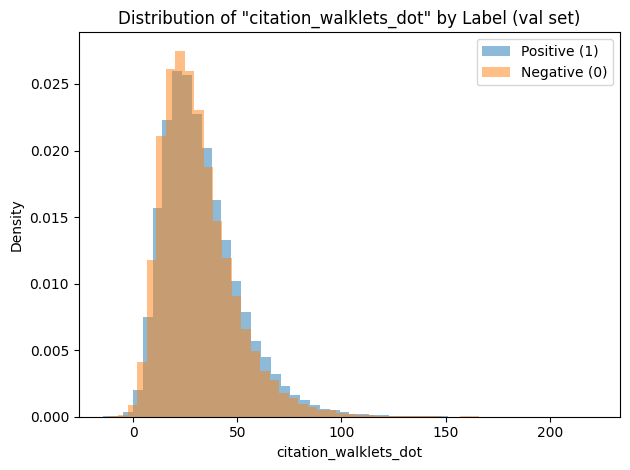

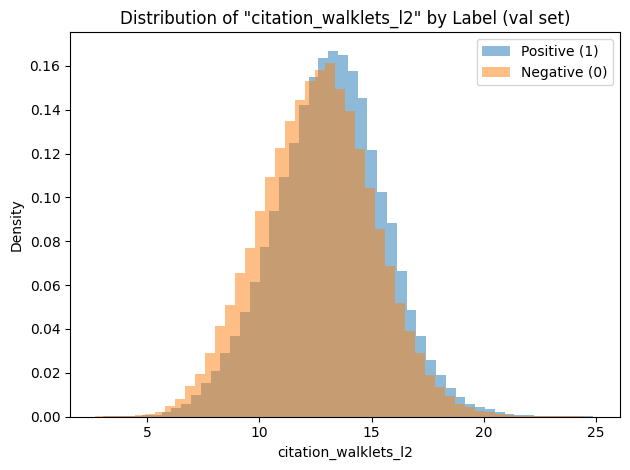

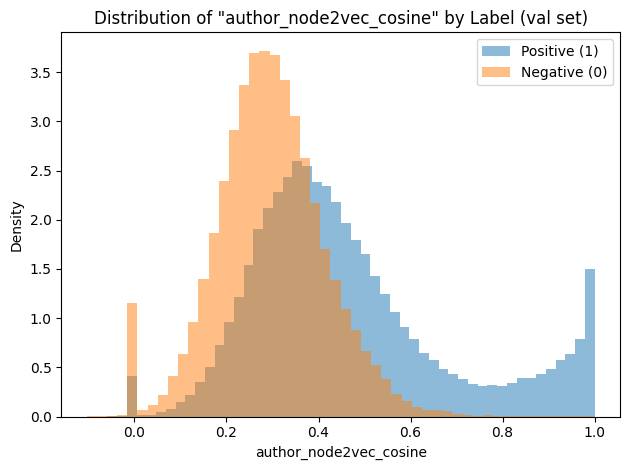

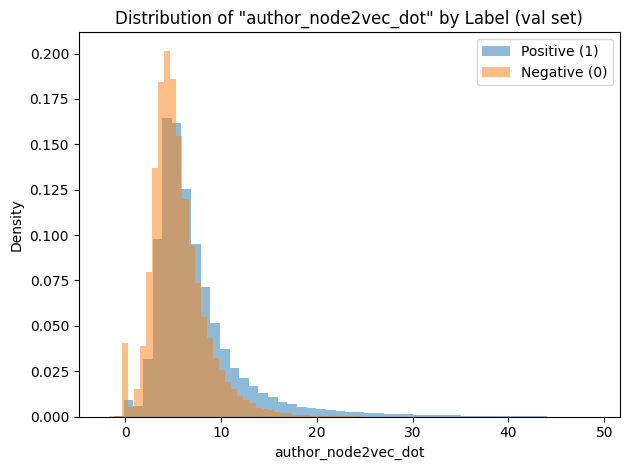

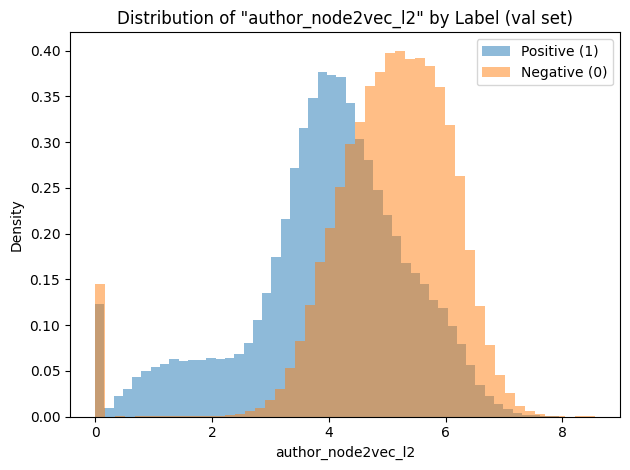

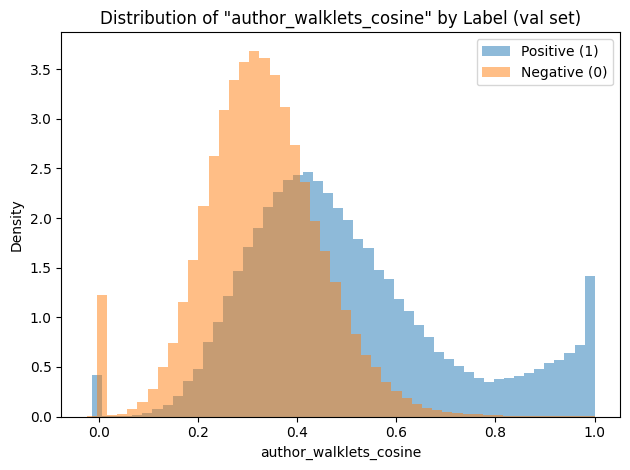

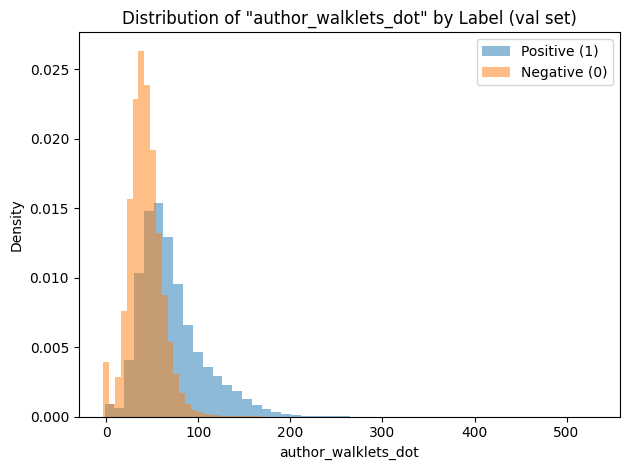

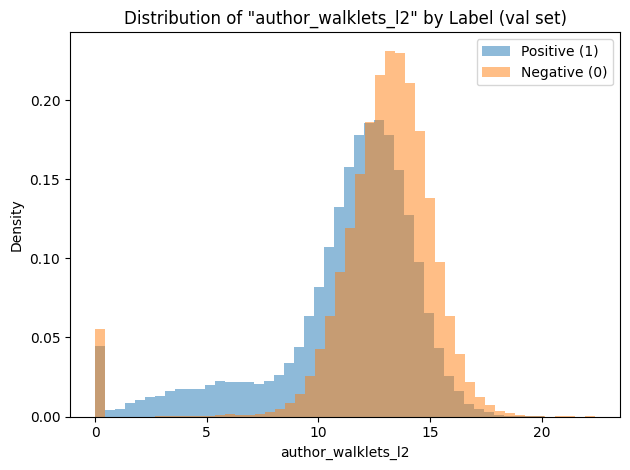

In [5]:
import pandas as pd
import matplotlib.pyplot as plt

# Path to the scalar features file (contains columns: citing, cited, label, split, and all scalar features)
# old path
path_feat = r'D:\NLP\tfidf_xgboost\split_train_val\scalar_features_train_val.parquet'

# Updated features
#path_feat = r'D:\NLP\data\data_features.parquet'


# 1. Load the scalar features directly (no merge needed)
df = pd.read_parquet(path_feat)

# 2. Filter for the validation split
val = df[df['split'] == 'val']

# 3. Identify feature columns (exclude meta columns)
feature_cols = [c for c in val.columns if c not in ['citing', 'cited', 'label', 'split']]

# 4. Plot distributions for each feature by label
for feat in feature_cols:
    plt.figure()
    # Positive and negative subsets
    pos = val[val['label'] == 1][feat].dropna()
    neg = val[val['label'] == 0][feat].dropna()
    # Histogram overlay
    plt.hist(pos, bins=50, density=True, alpha=0.5)
    plt.hist(neg, bins=50, density=True, alpha=0.5)
    plt.title(f'Distribution of "{feat}" by Label (val set)')
    plt.xlabel(feat)
    plt.ylabel('Density')
    plt.legend(['Positive (1)', 'Negative (0)'])
    plt.tight_layout()
    plt.show()


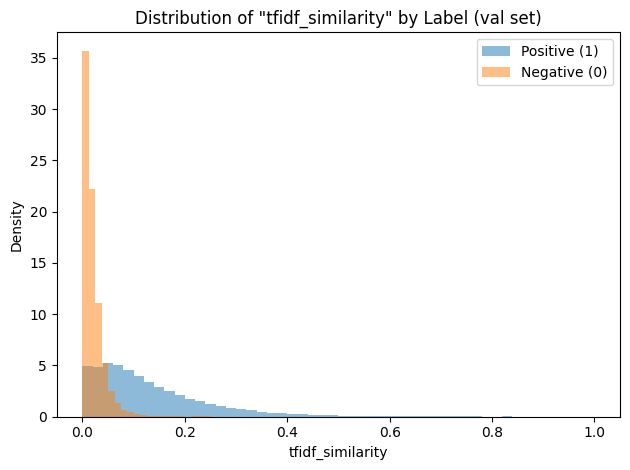

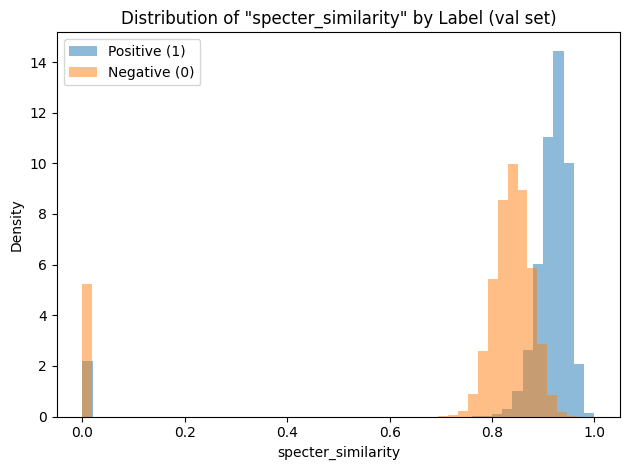

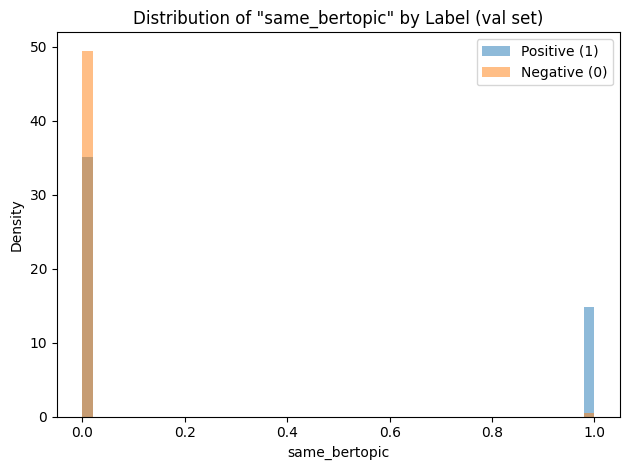

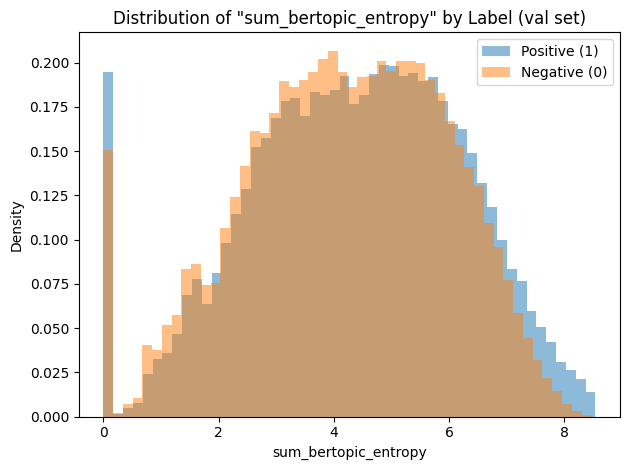

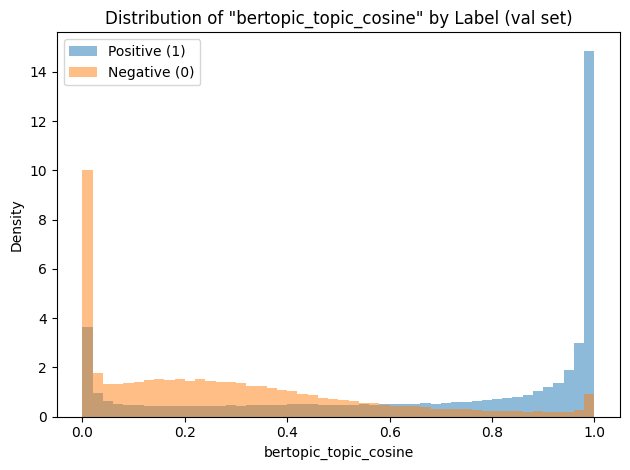

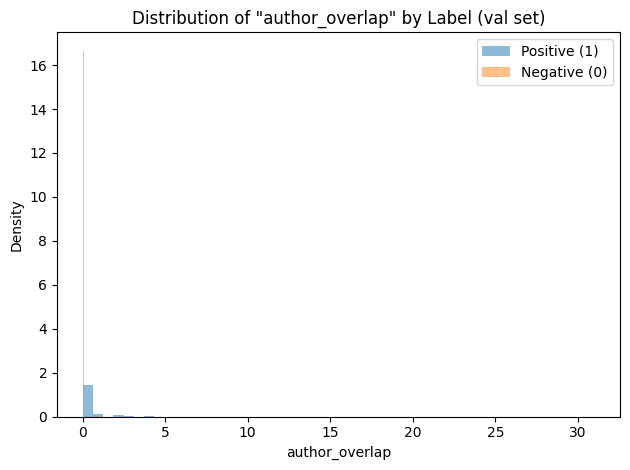

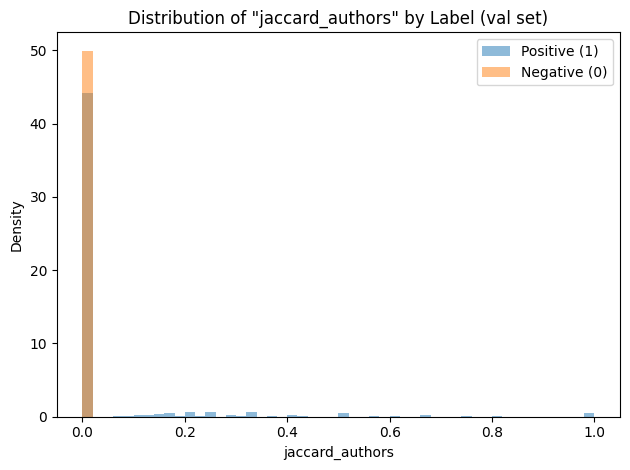

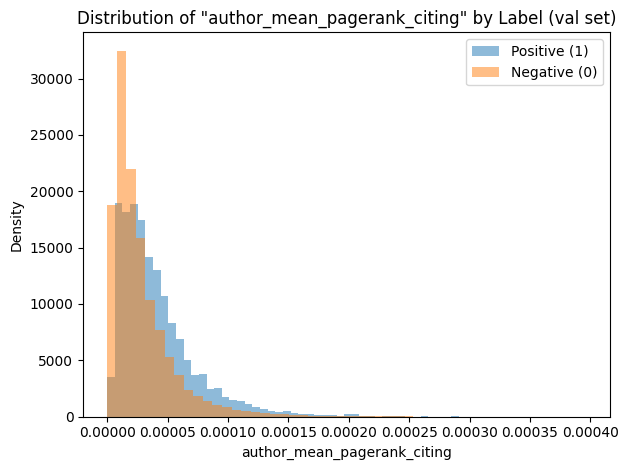

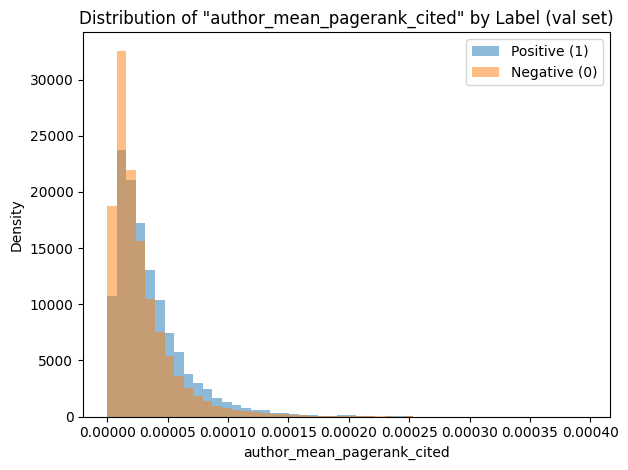

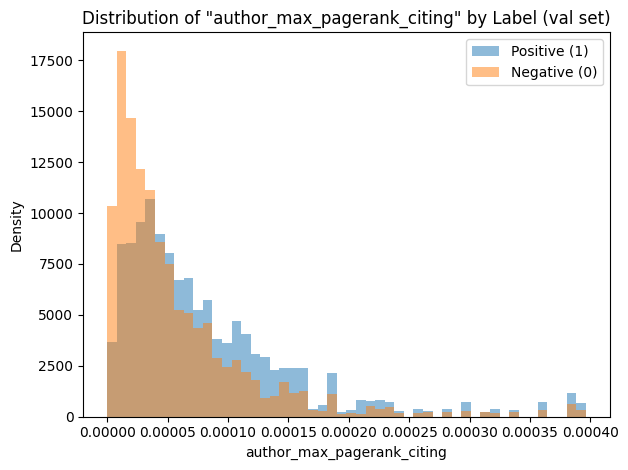

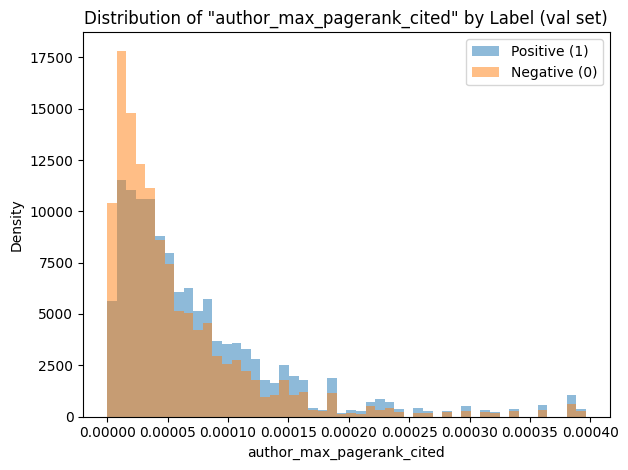

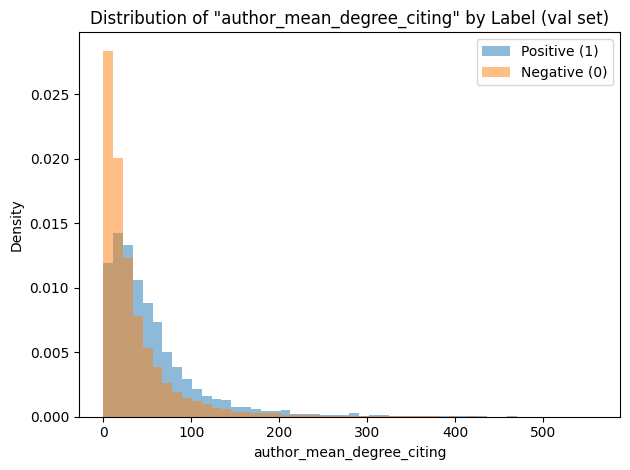

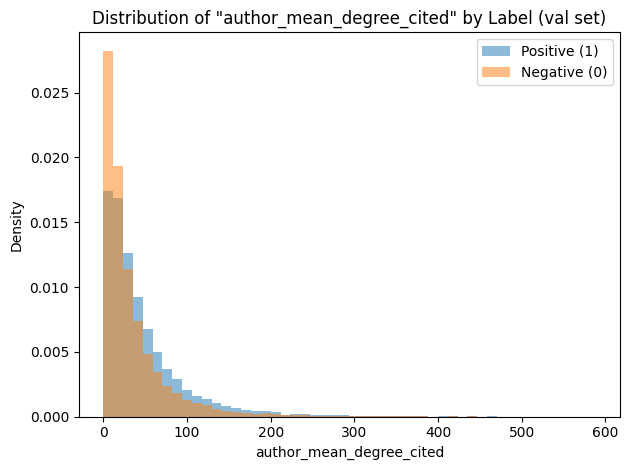

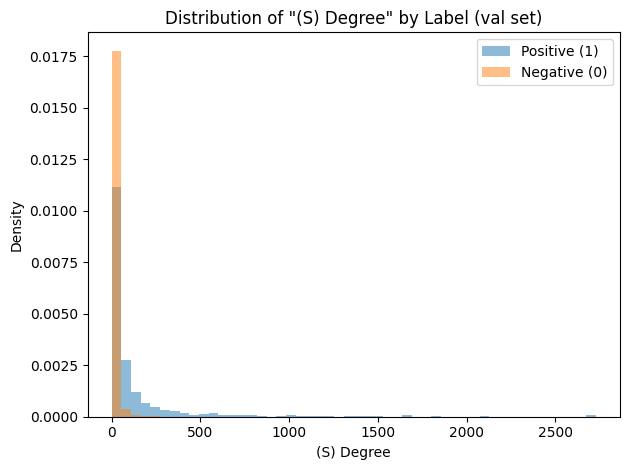

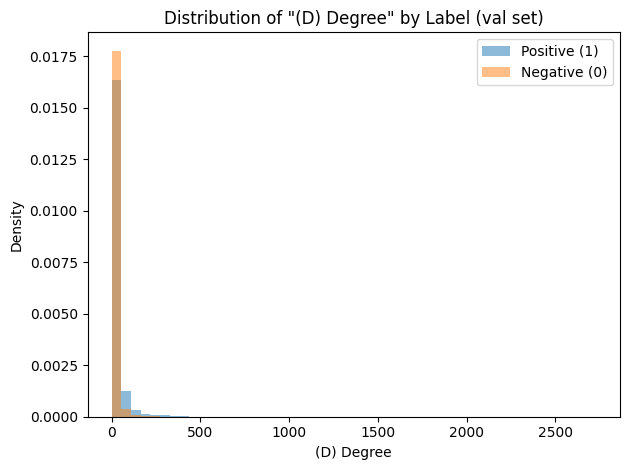

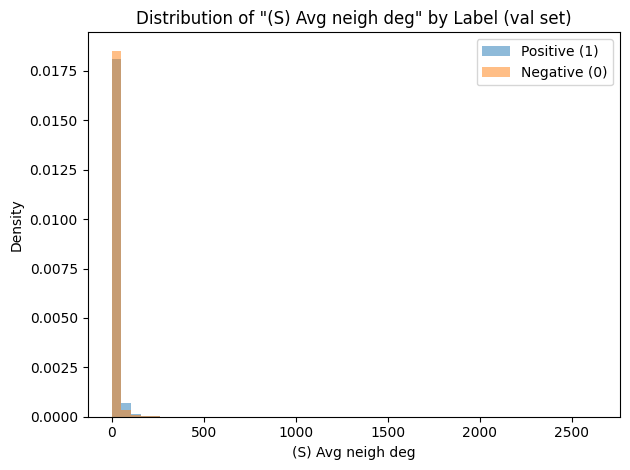

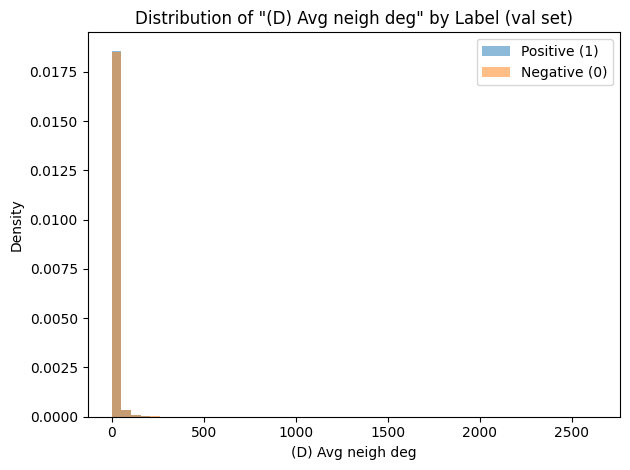

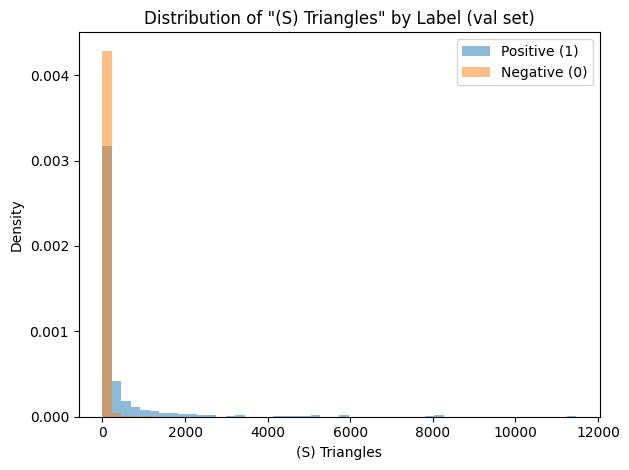

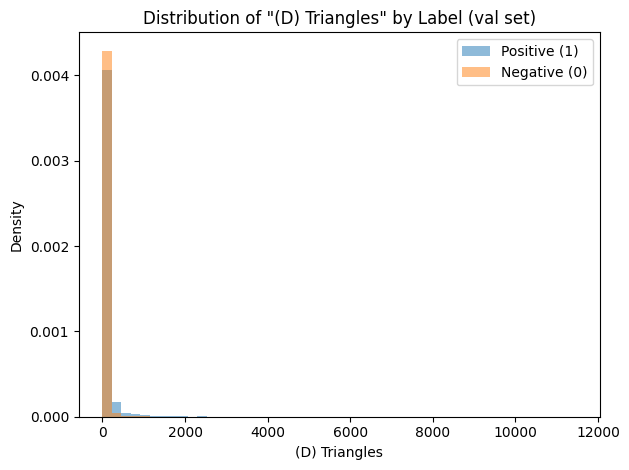

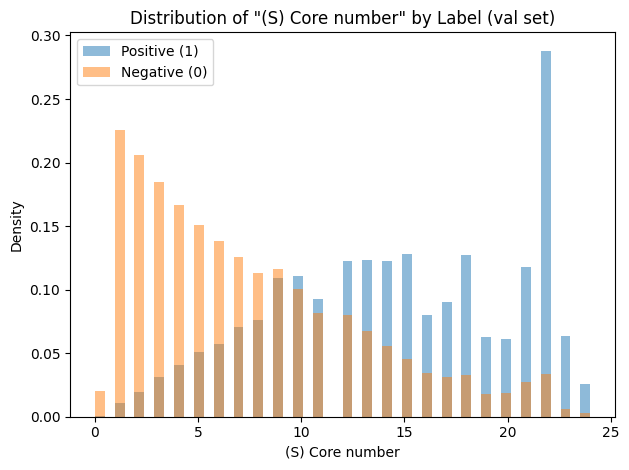

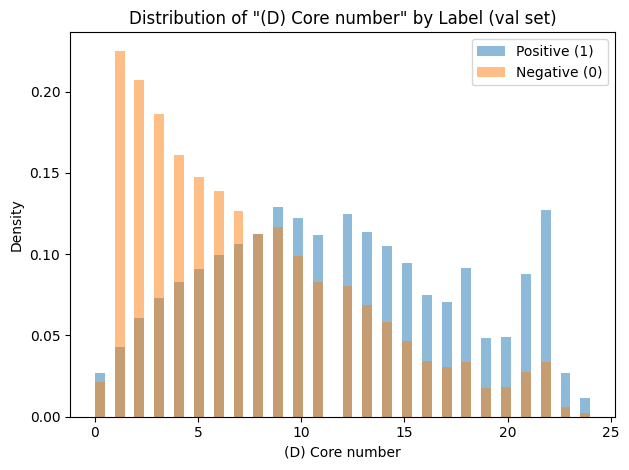

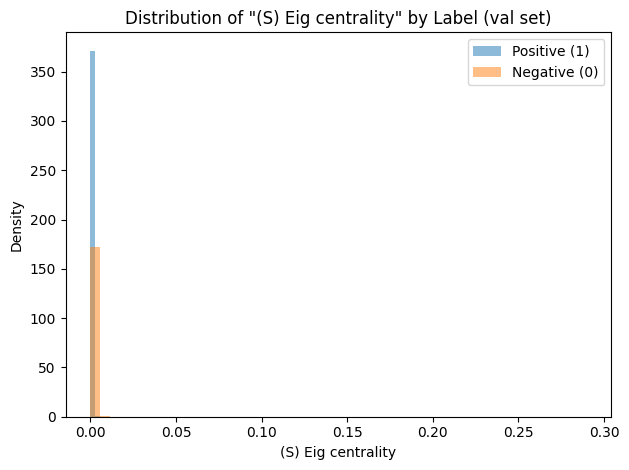

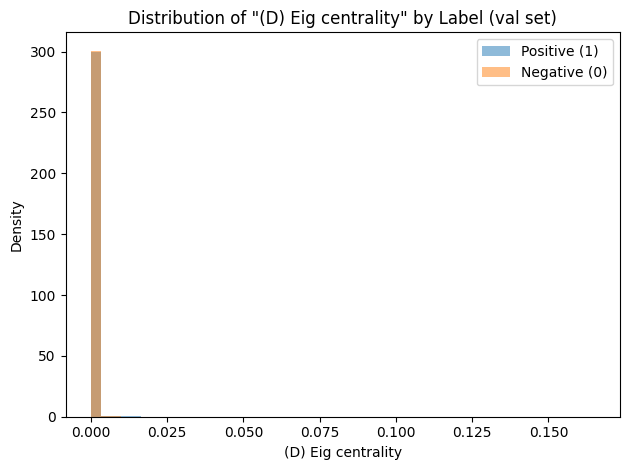

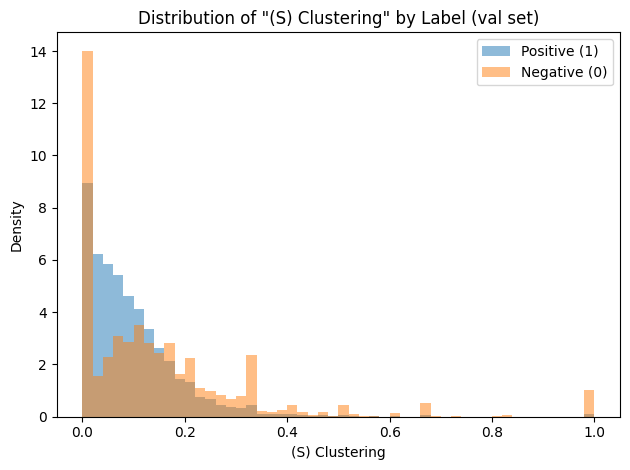

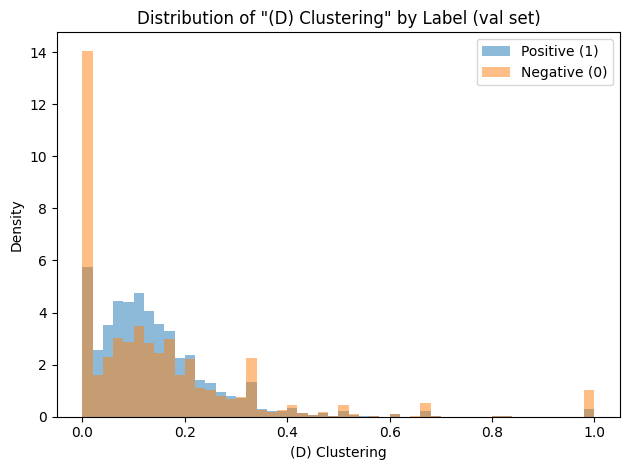

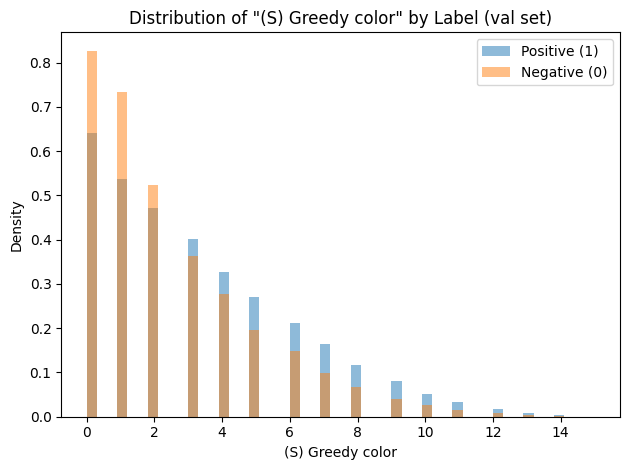

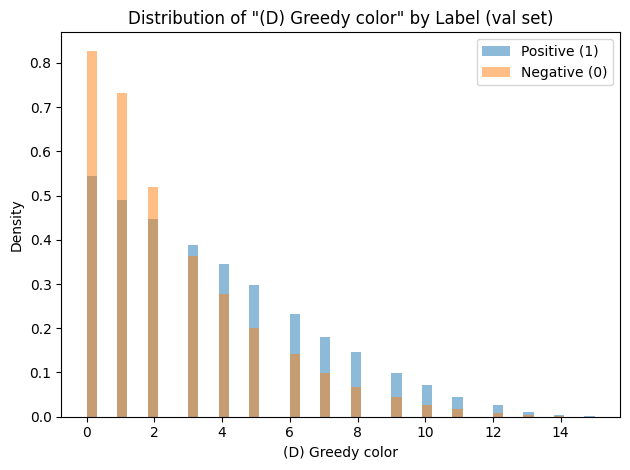

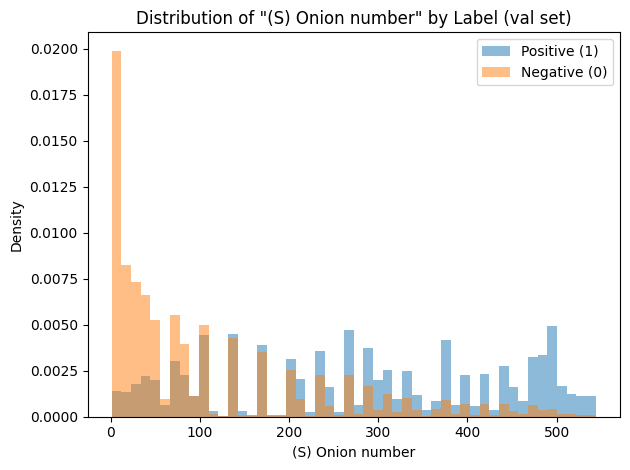

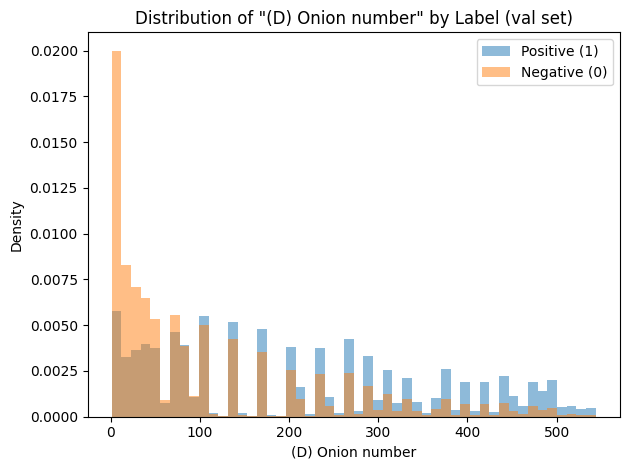

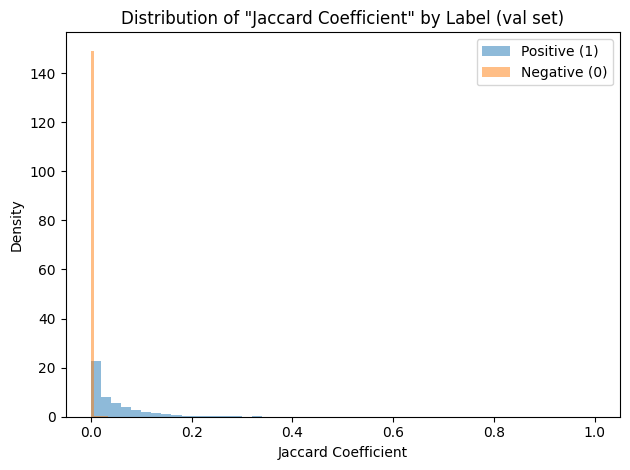

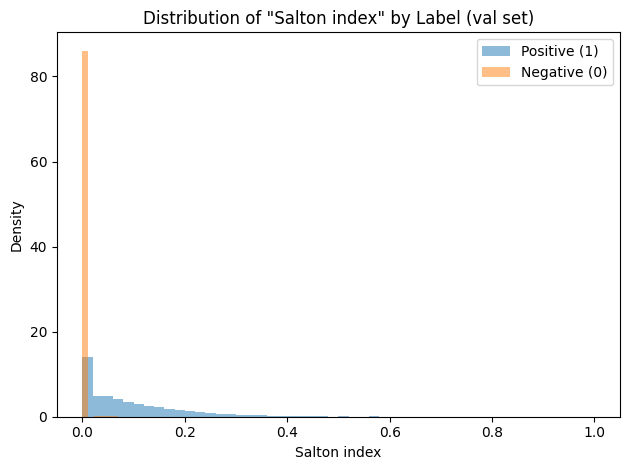

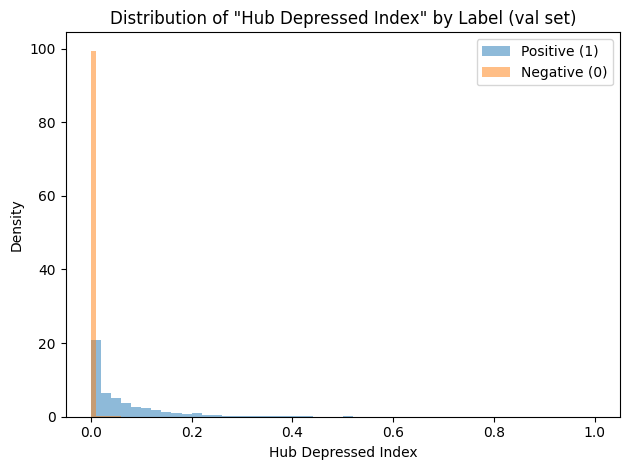

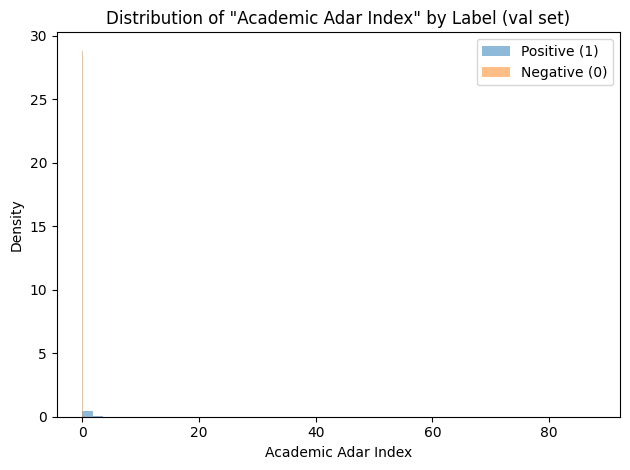

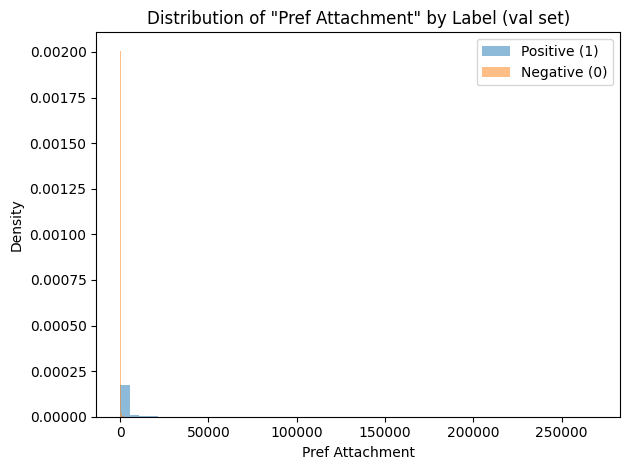

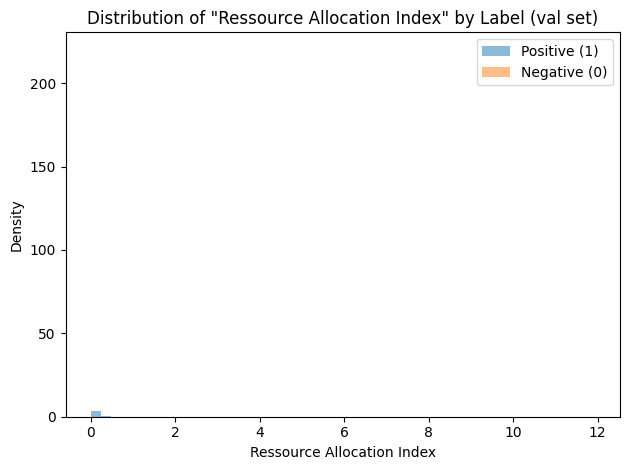

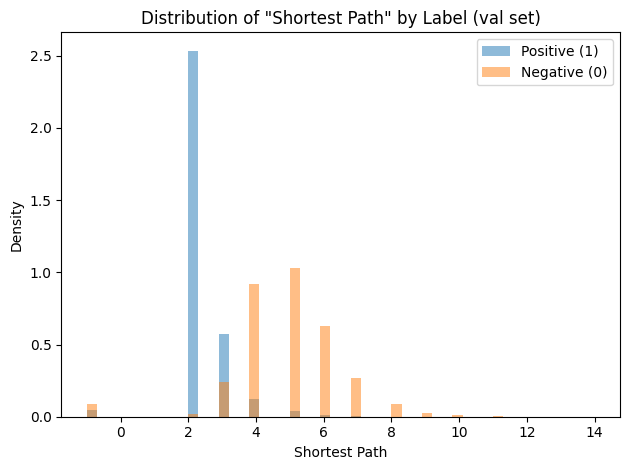

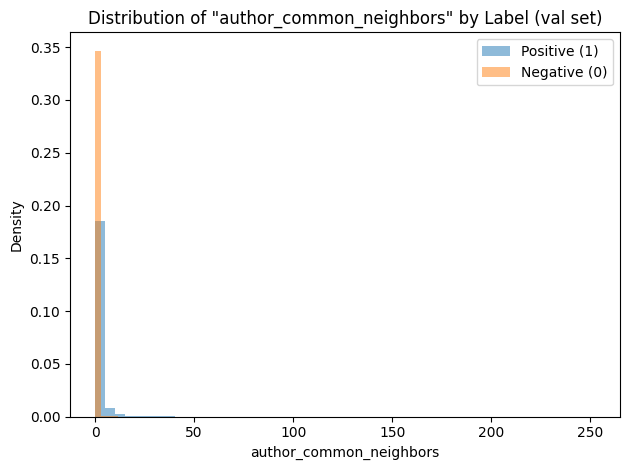

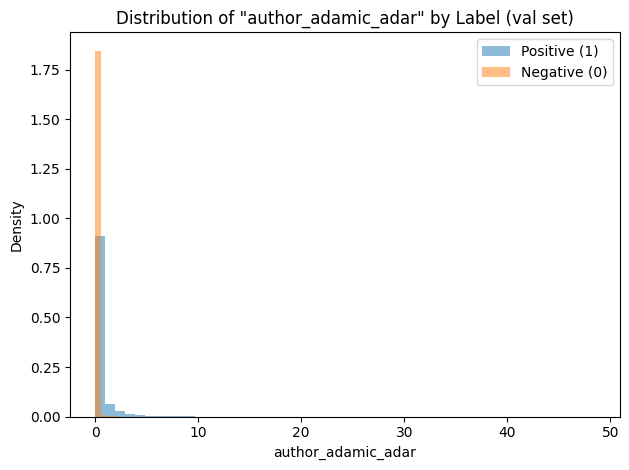

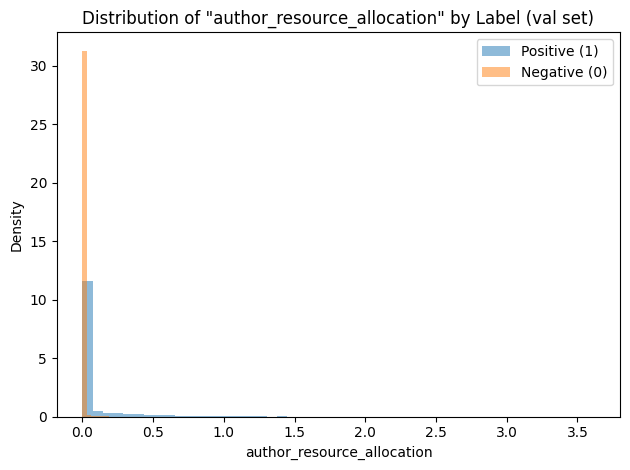

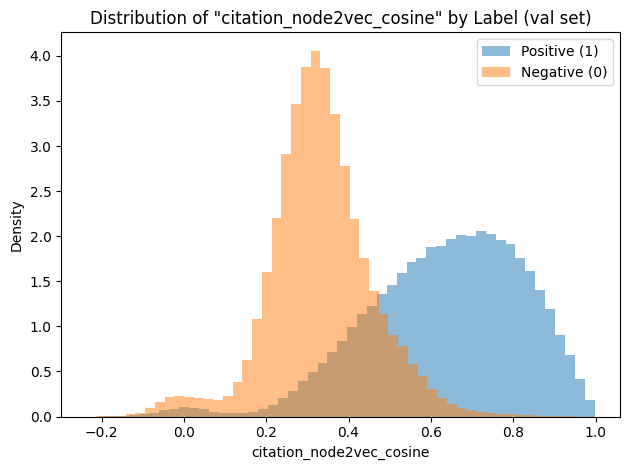

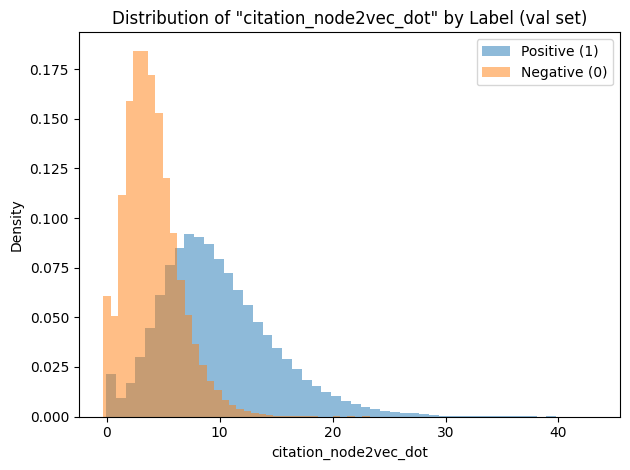

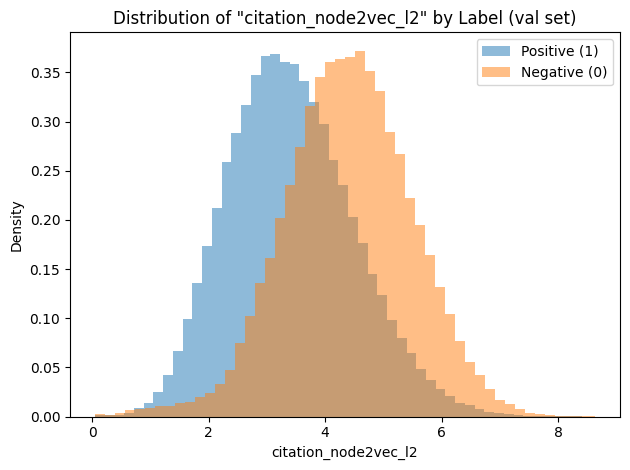

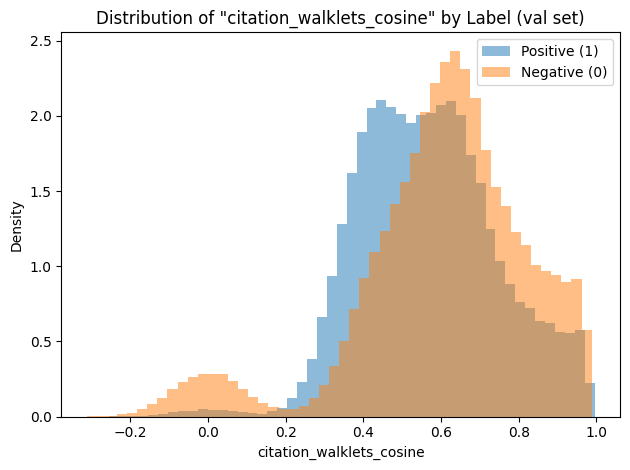

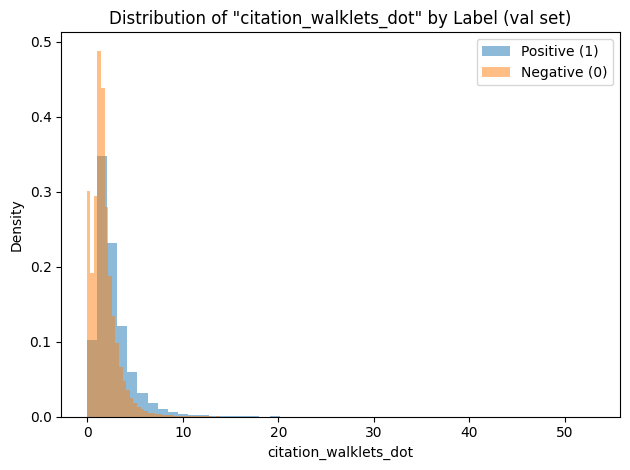

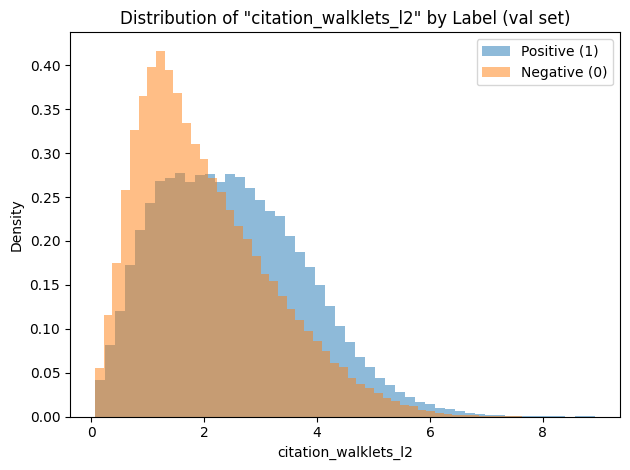

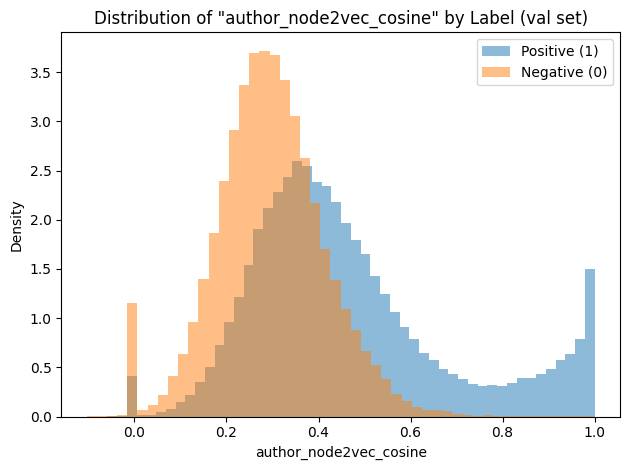

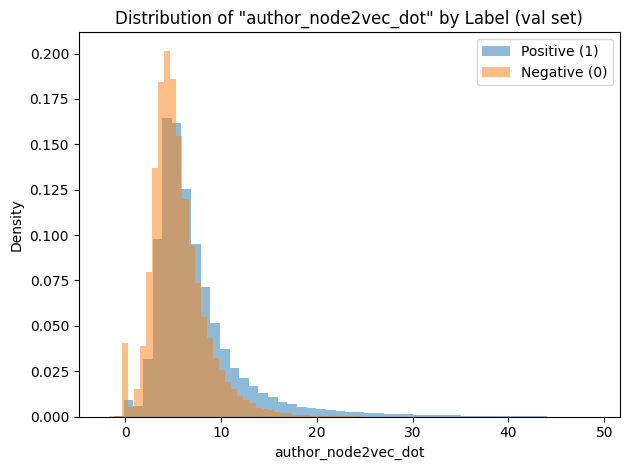

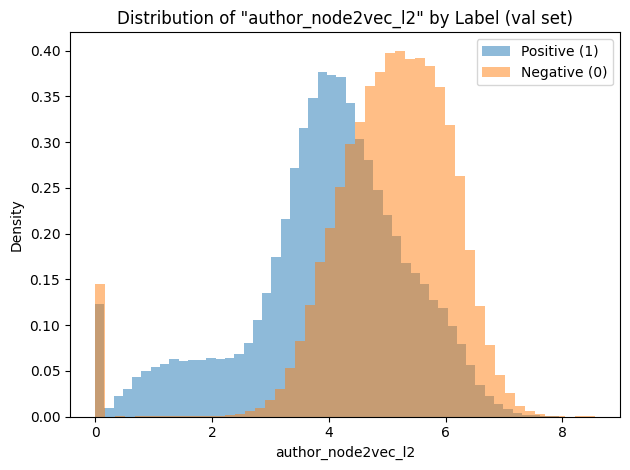

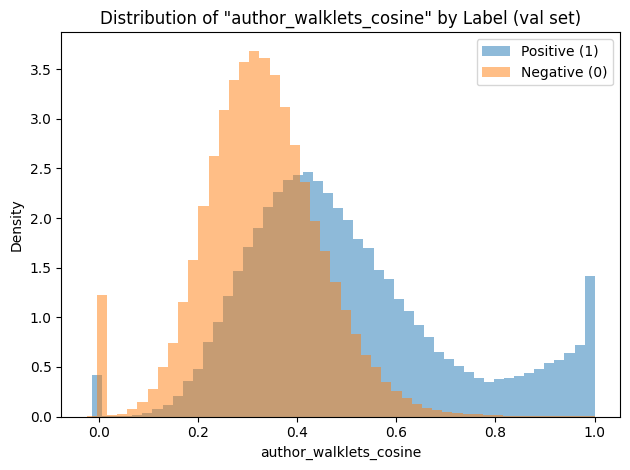

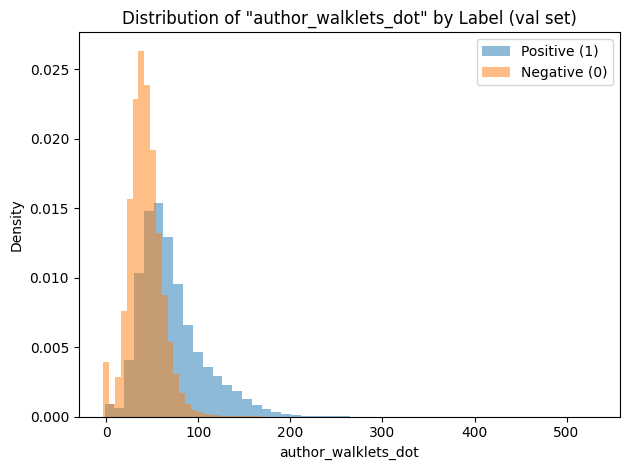

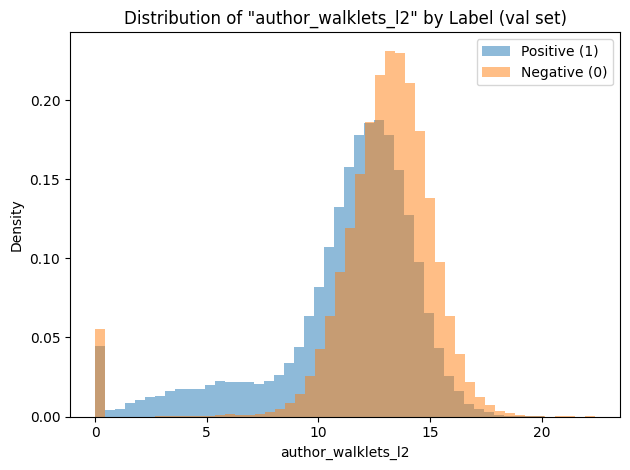

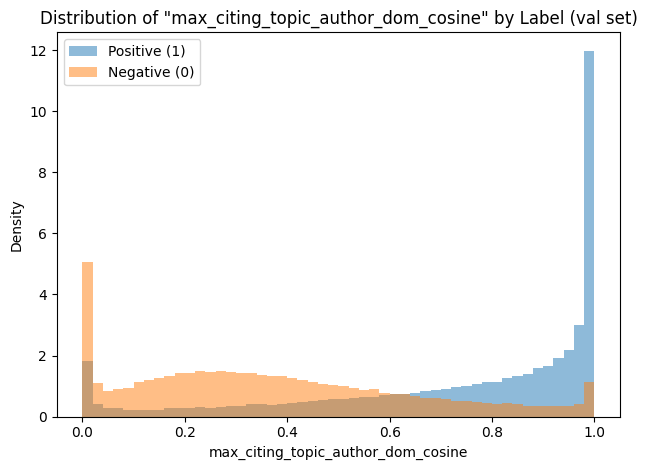

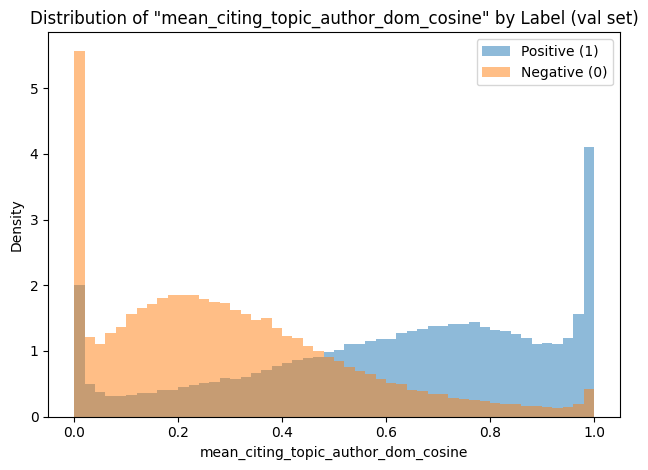

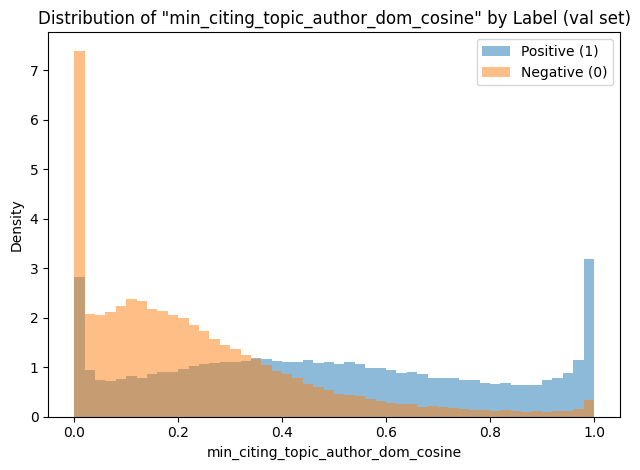

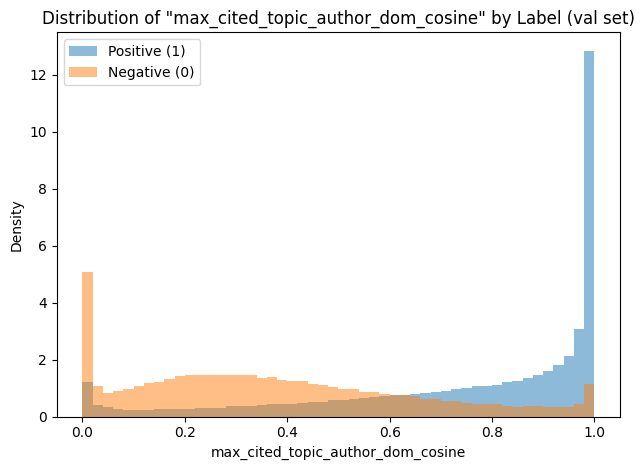

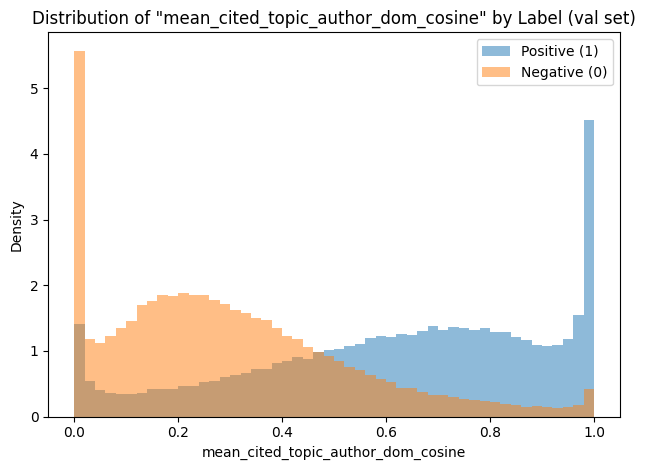

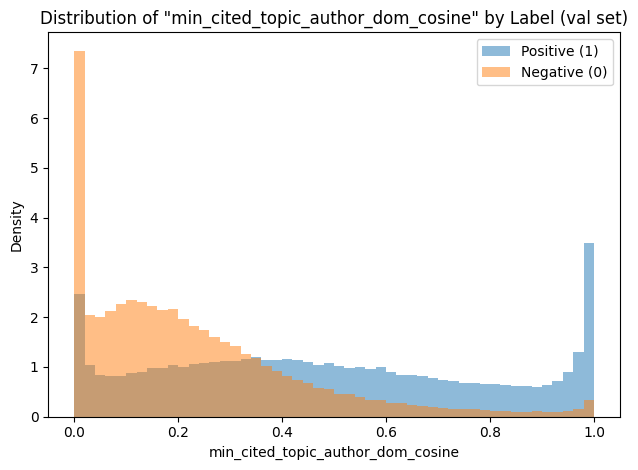

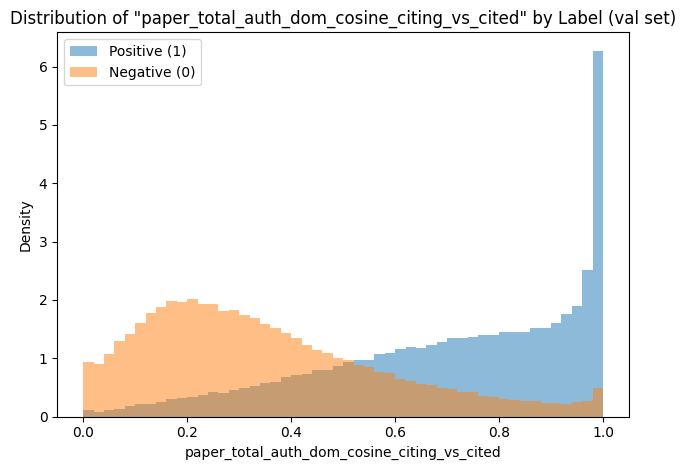

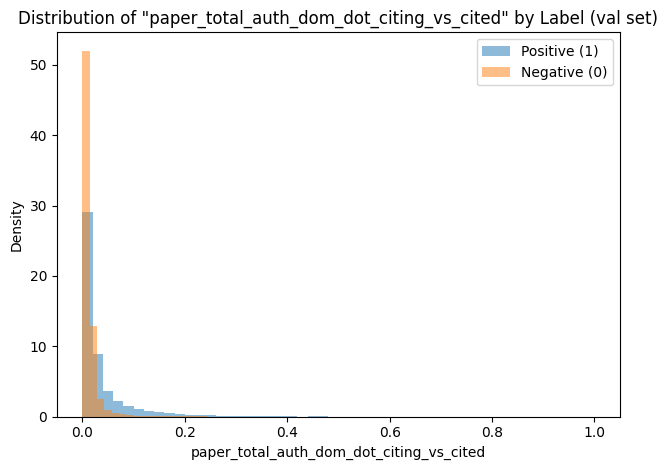

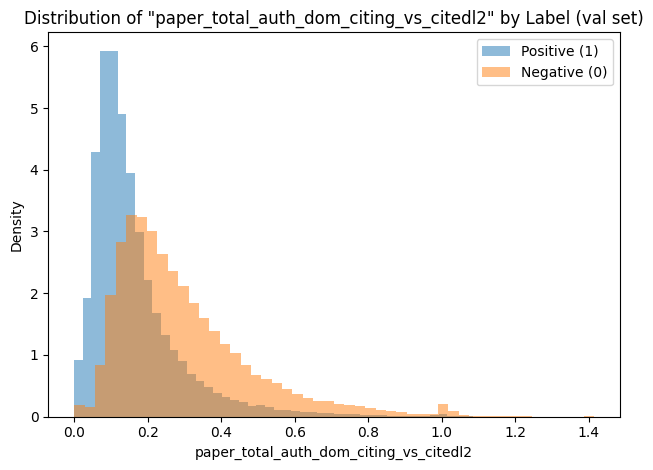

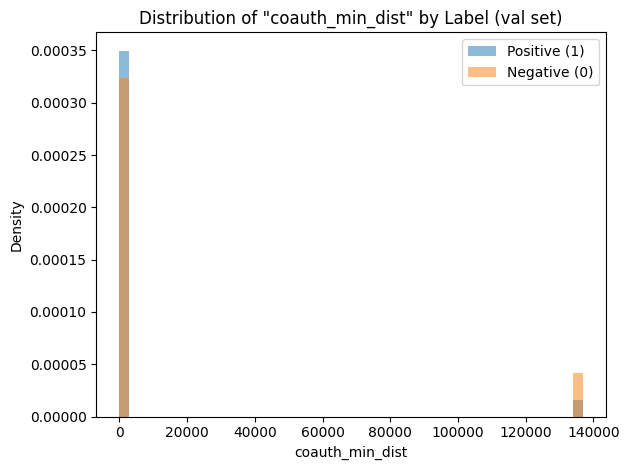

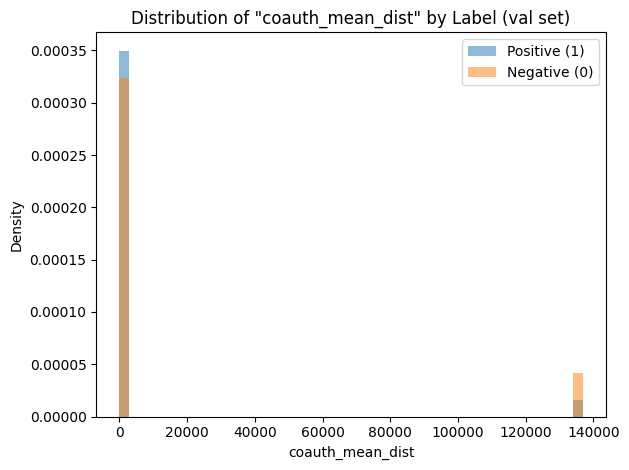

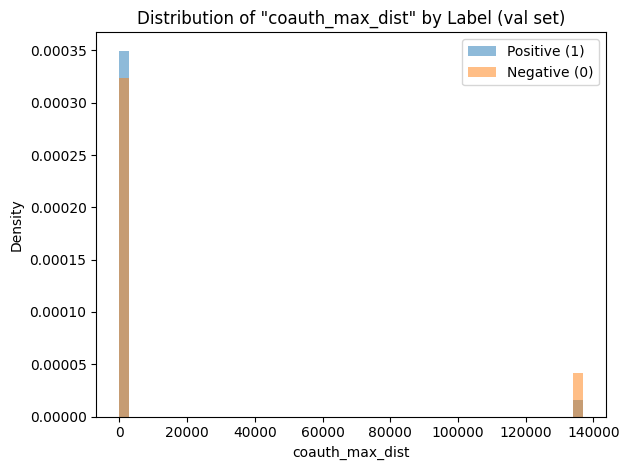

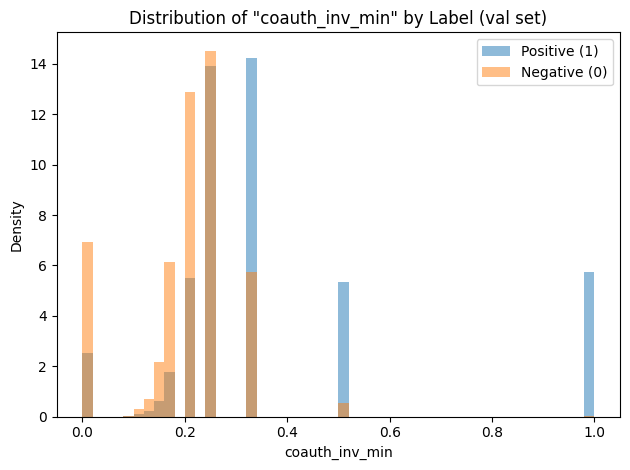

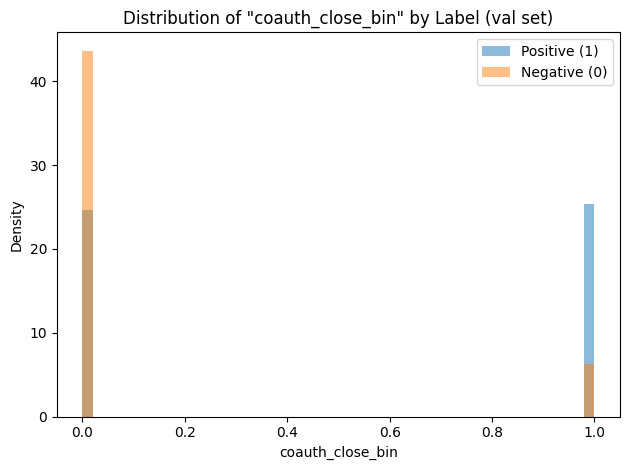

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

# Path to the scalar features file (contains columns: citing, cited, label, split, and all scalar features)
# old path
#path_feat = r'D:\NLP\tfidf_xgboost\split_train_val\scalar_features_train_val.parquet'

# Updated features
path_feat = r'D:\NLP\data\data_features.parquet'


# 1. Load the scalar features directly (no merge needed)
df = pd.read_parquet(path_feat)

# 2. Filter for the validation split
val = df[df['split'] == 'val']

# 3. Identify feature columns (exclude meta columns)
feature_cols = [c for c in val.columns if c not in ['citing', 'cited', 'label', 'split']]

# 4. Plot distributions for each feature by label
for feat in feature_cols:
    plt.figure()
    # Positive and negative subsets
    pos = val[val['label'] == 1][feat].dropna()
    neg = val[val['label'] == 0][feat].dropna()
    # Histogram overlay
    plt.hist(pos, bins=50, density=True, alpha=0.5)
    plt.hist(neg, bins=50, density=True, alpha=0.5)
    plt.title(f'Distribution of "{feat}" by Label (val set)')
    plt.xlabel(feat)
    plt.ylabel('Density')
    plt.legend(['Positive (1)', 'Negative (0)'])
    plt.tight_layout()
    plt.show()


In [3]:
# Standard Normalized Graphs

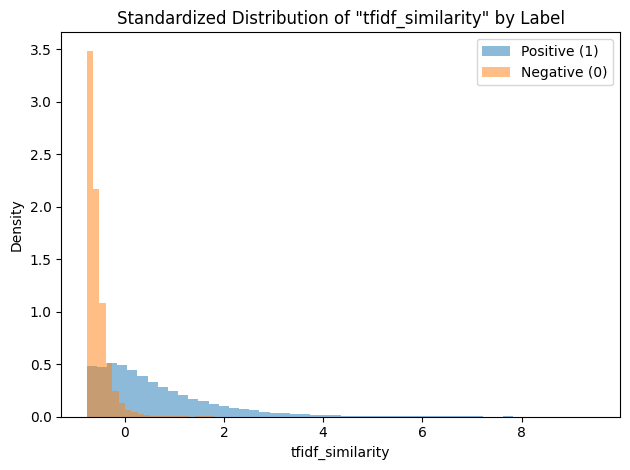

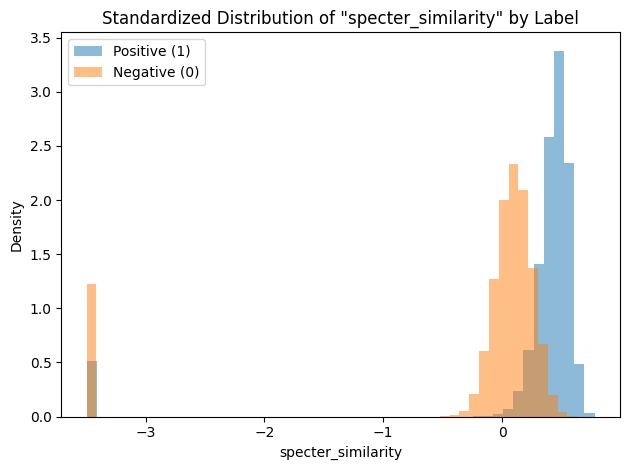

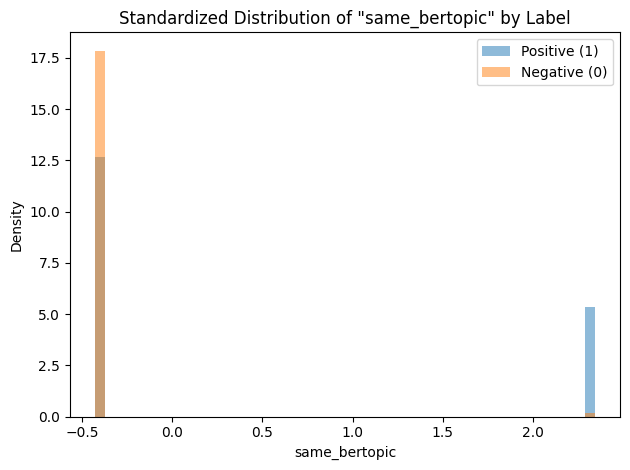

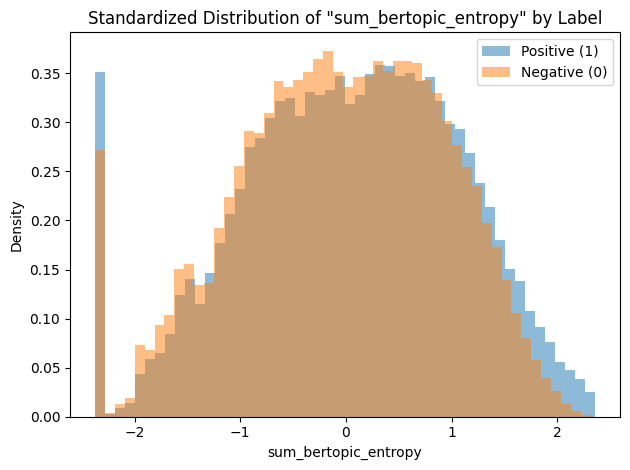

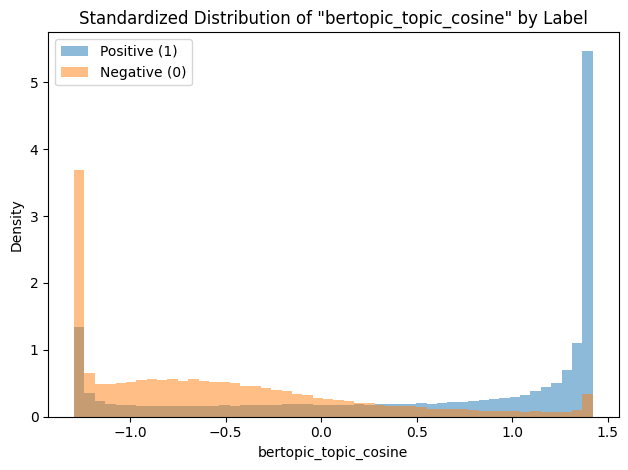

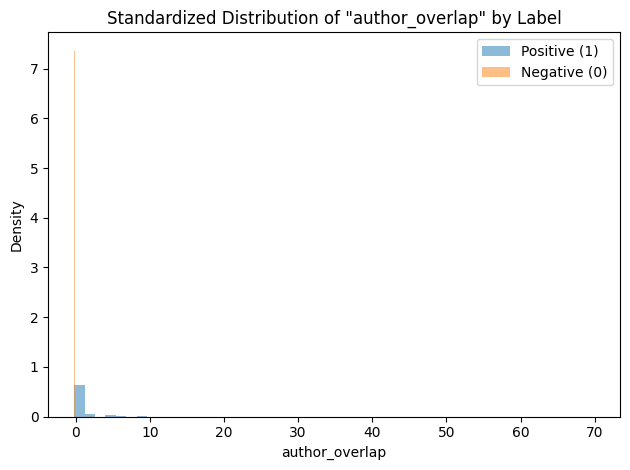

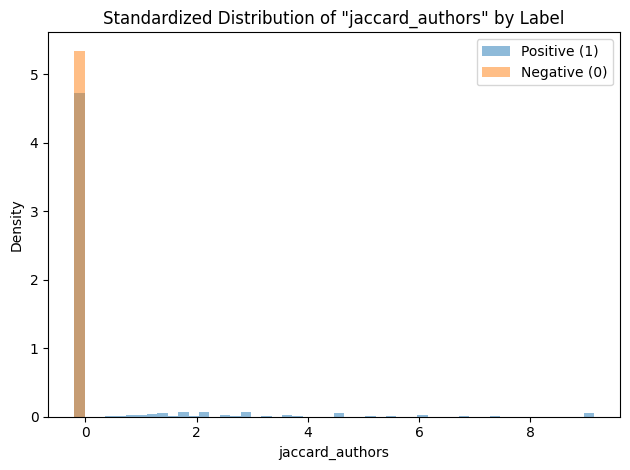

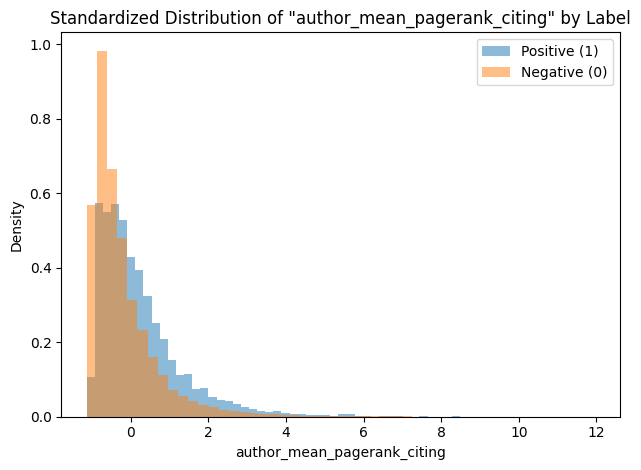

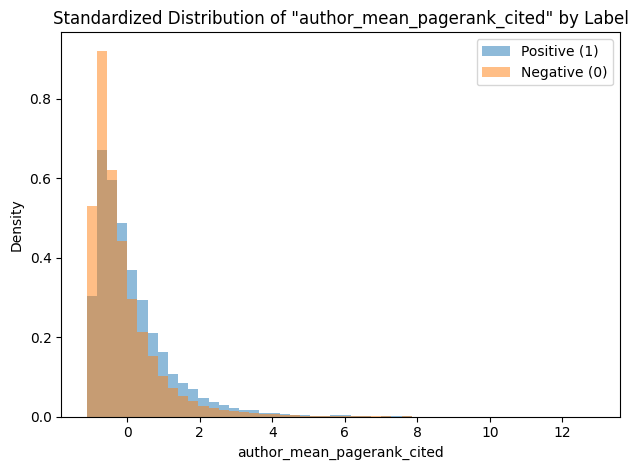

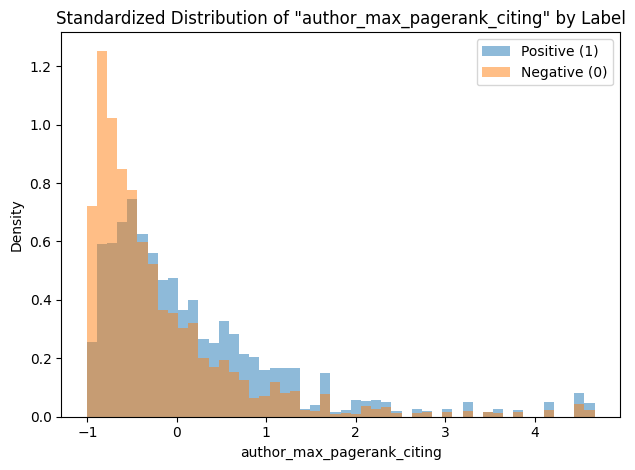

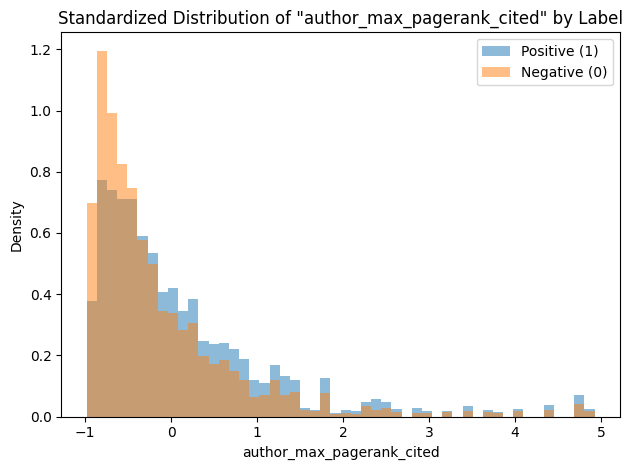

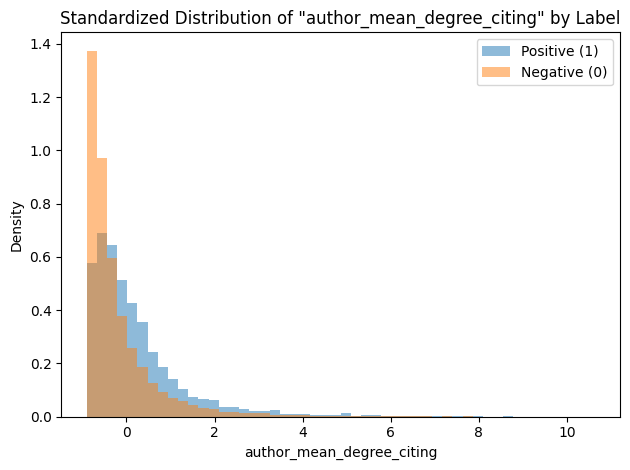

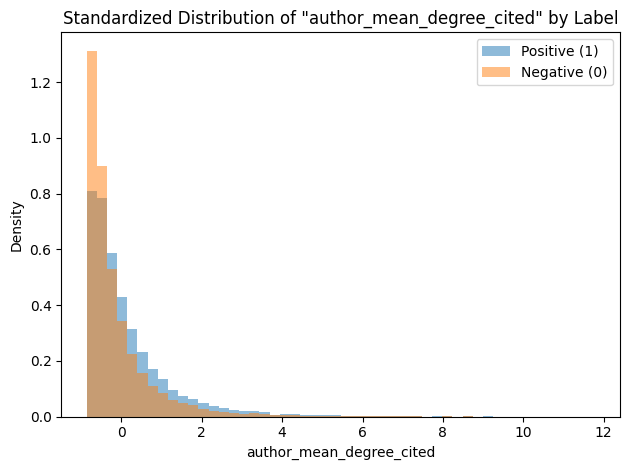

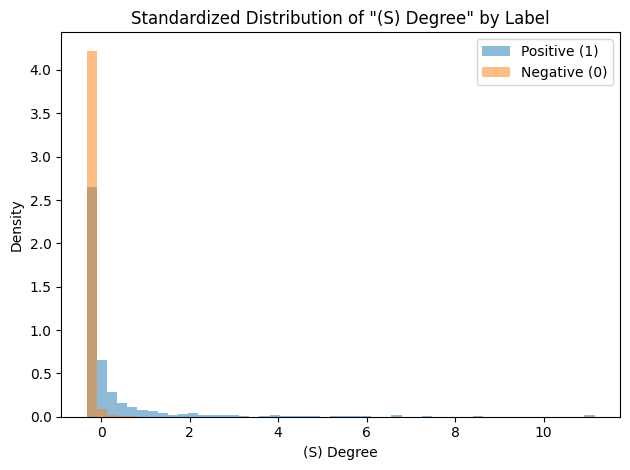

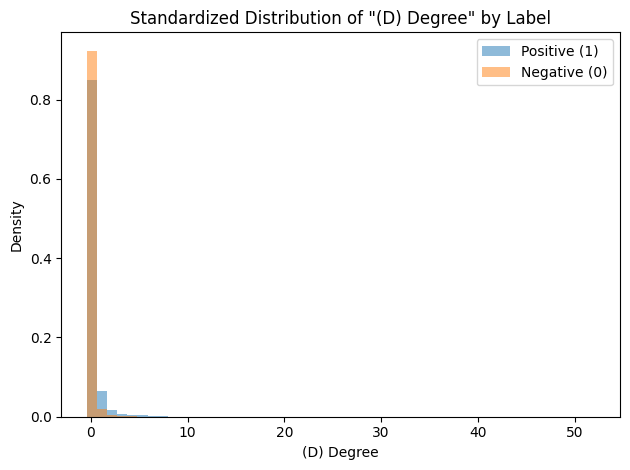

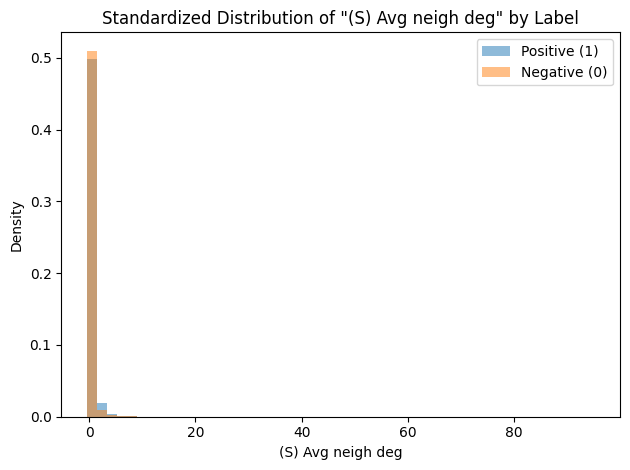

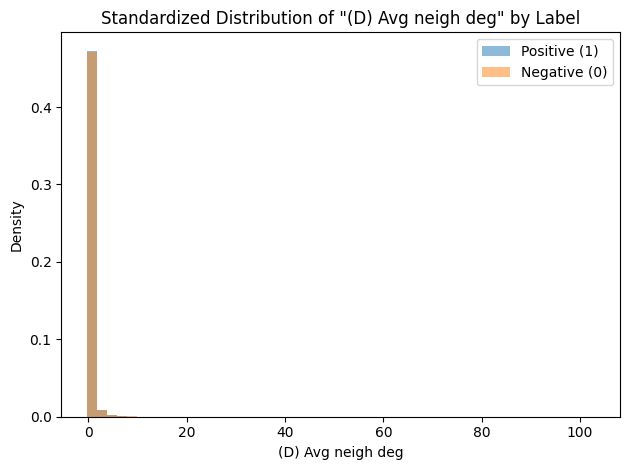

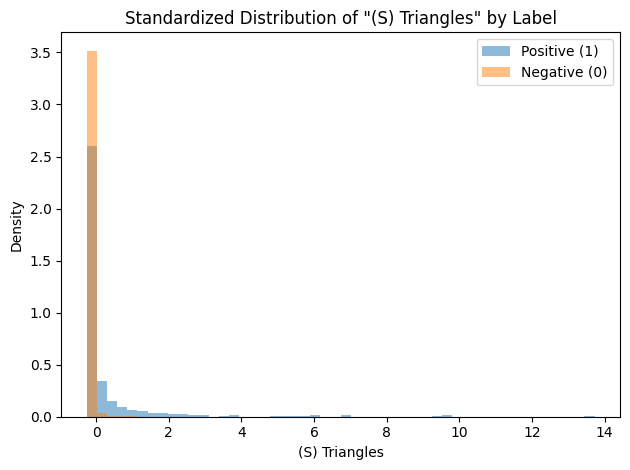

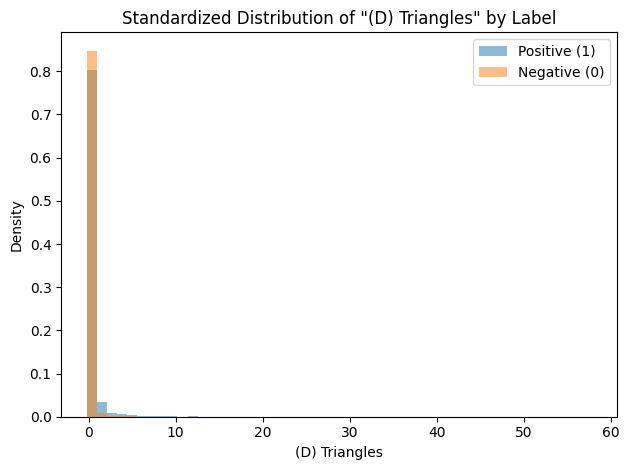

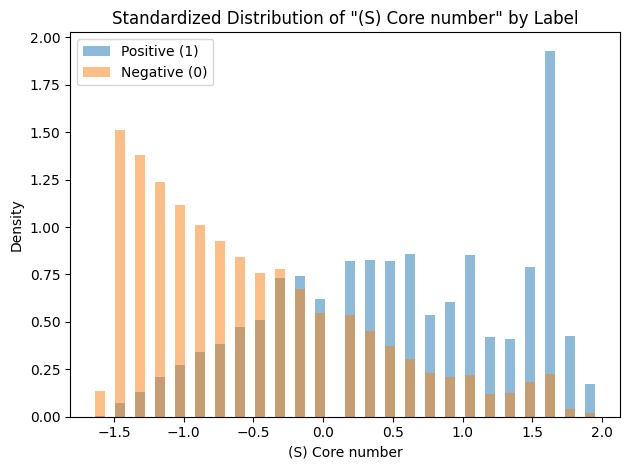

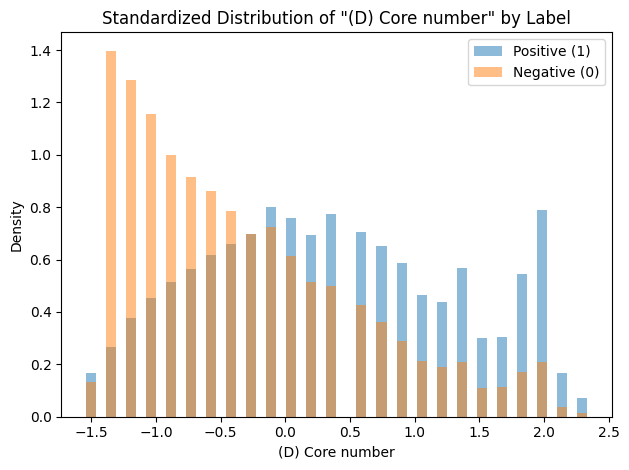

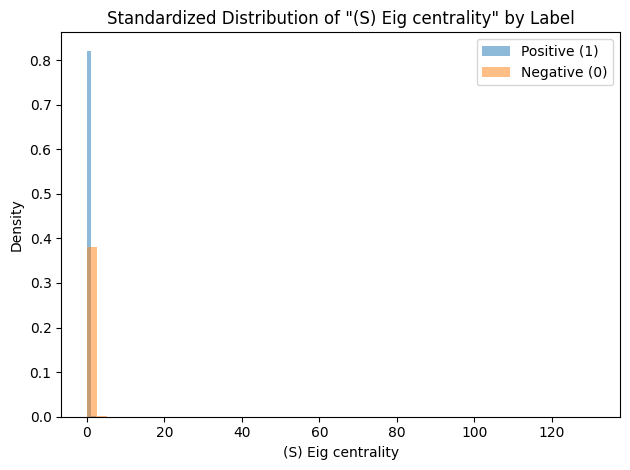

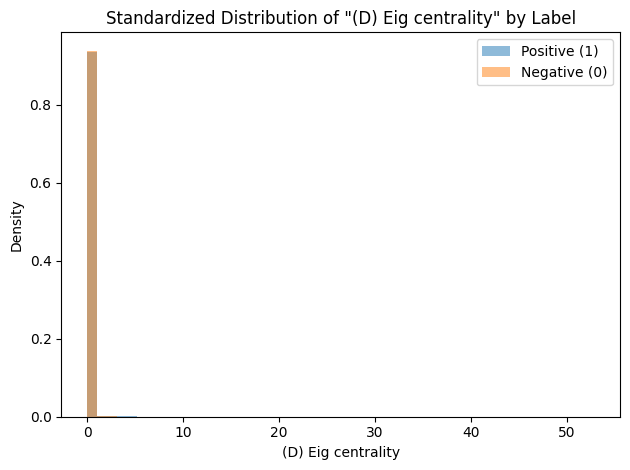

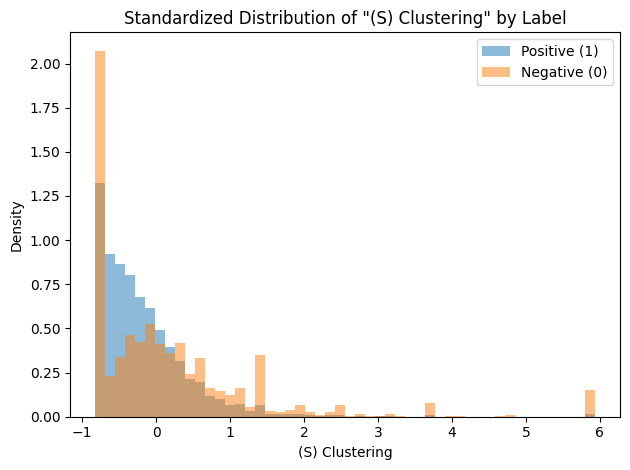

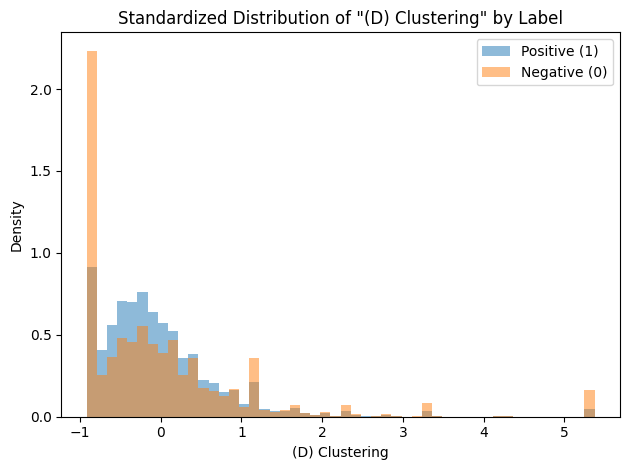

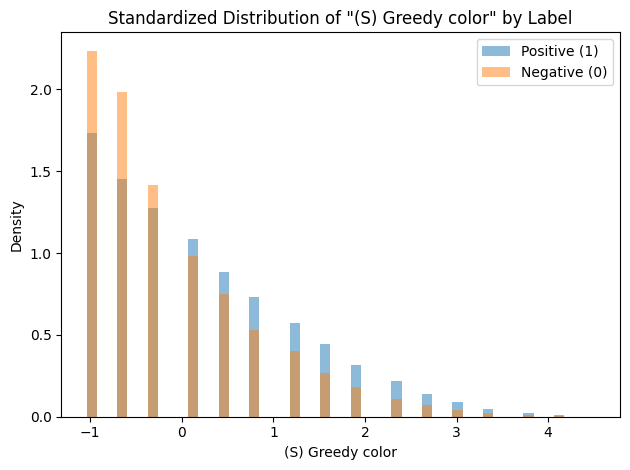

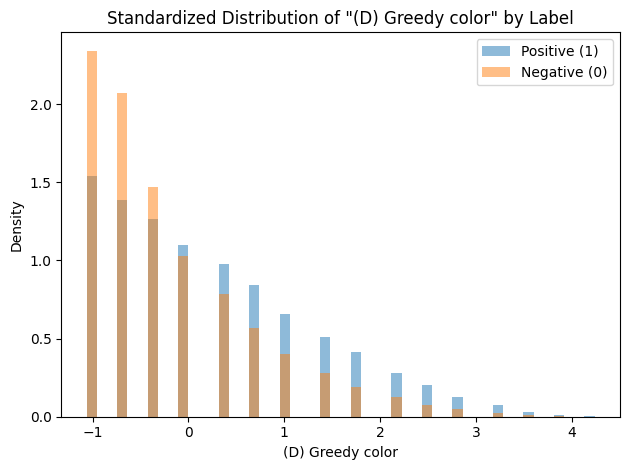

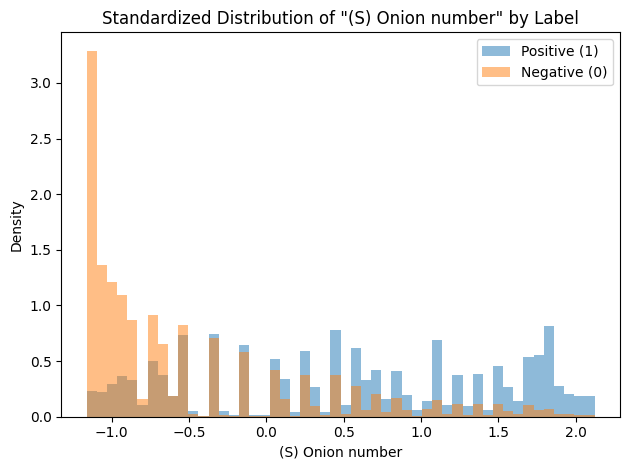

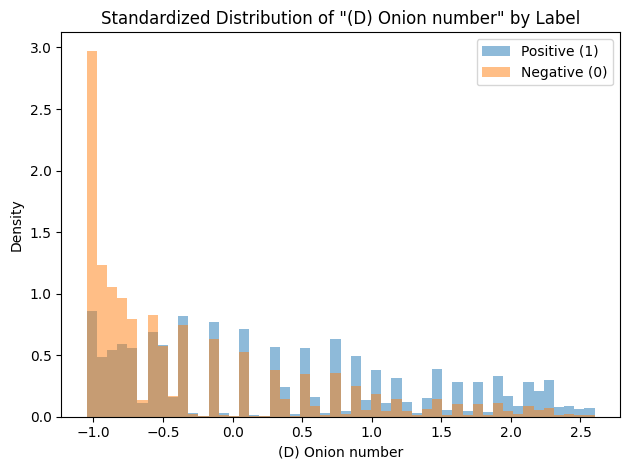

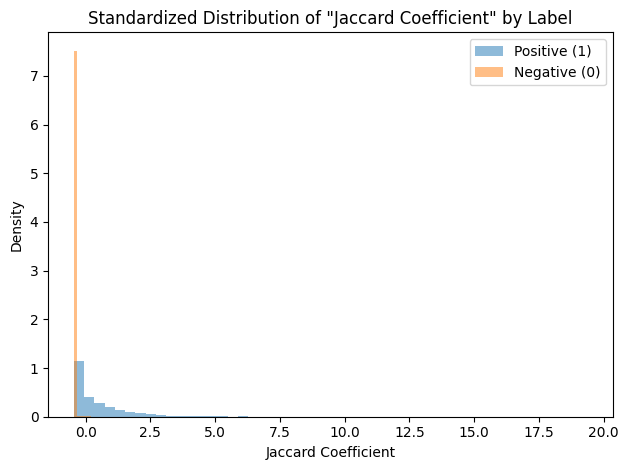

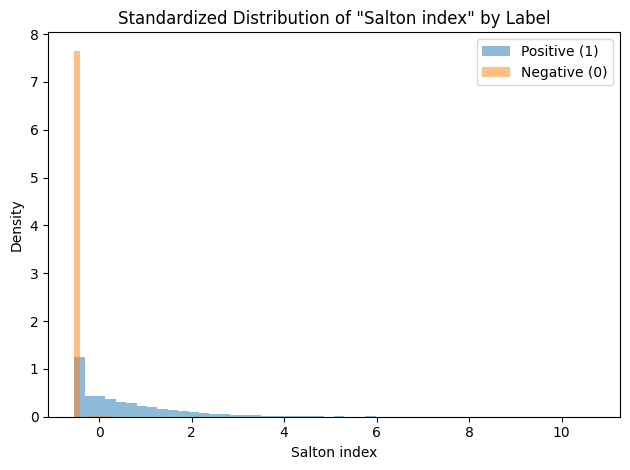

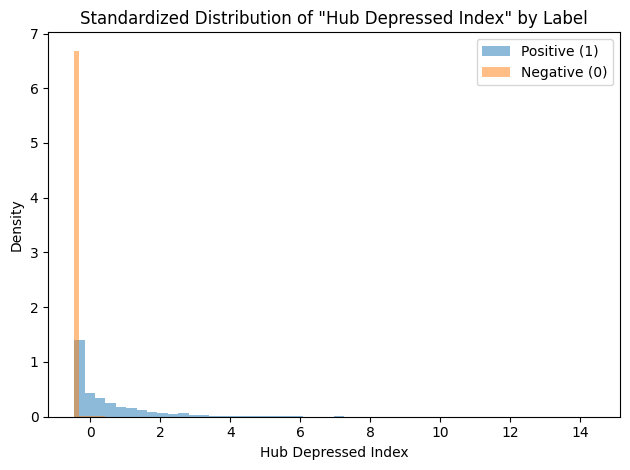

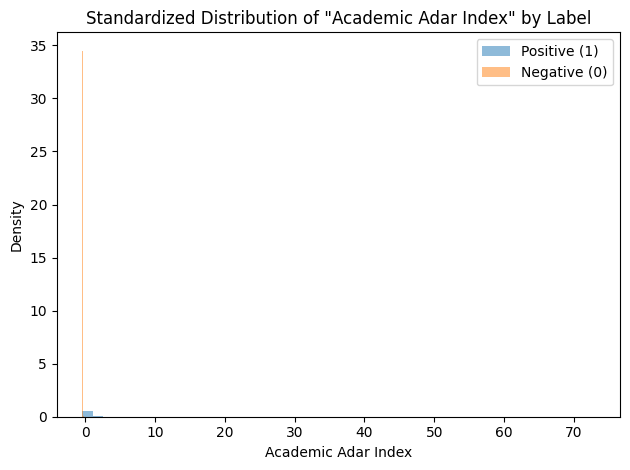

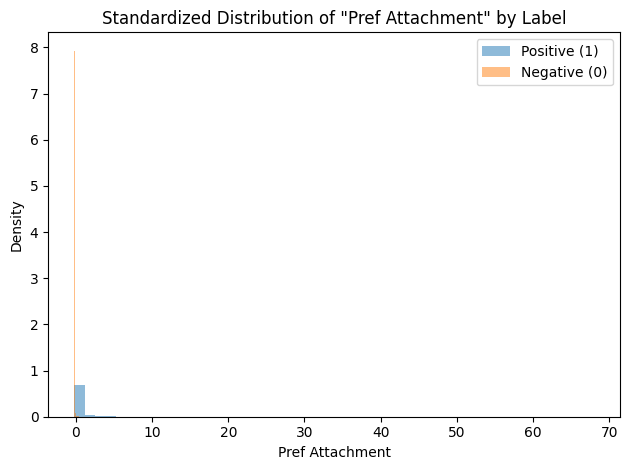

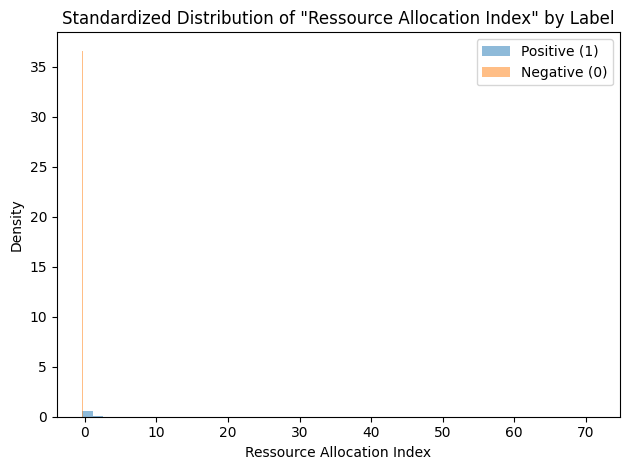

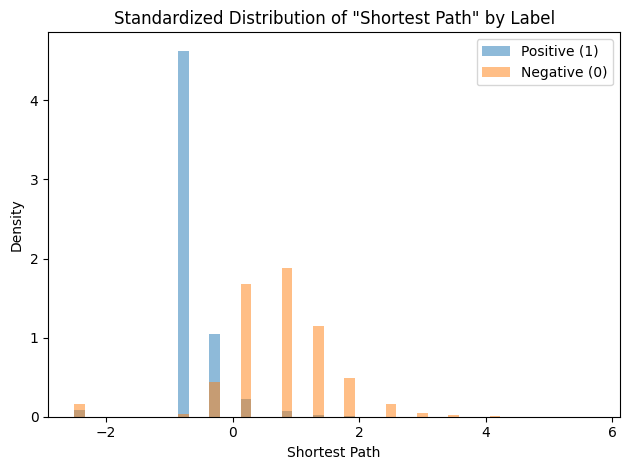

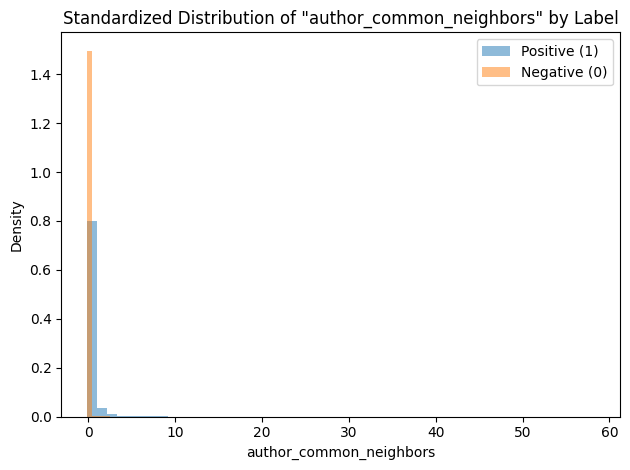

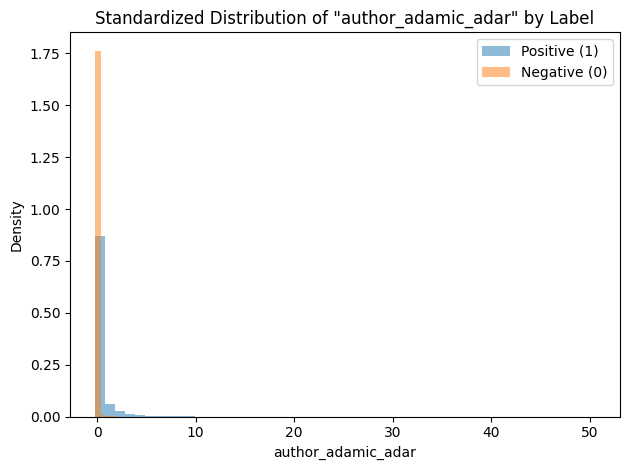

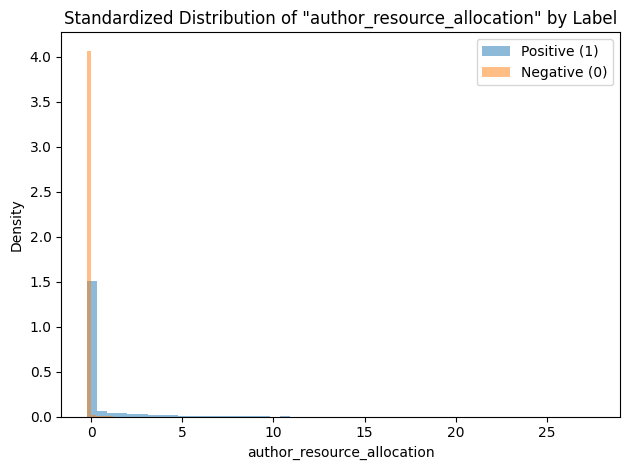

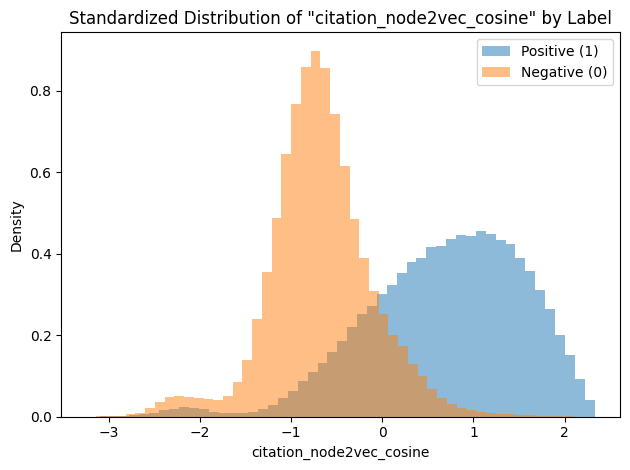

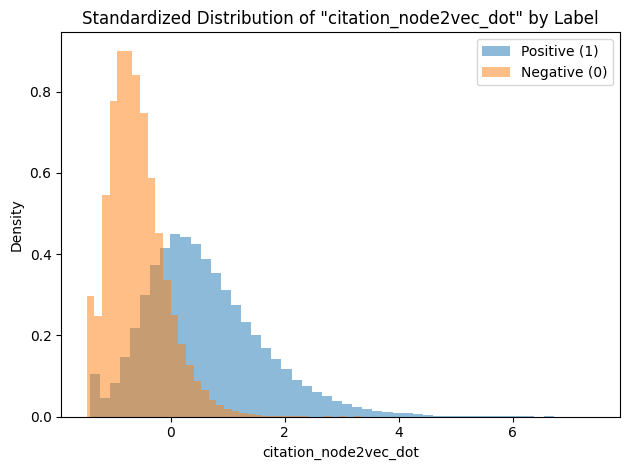

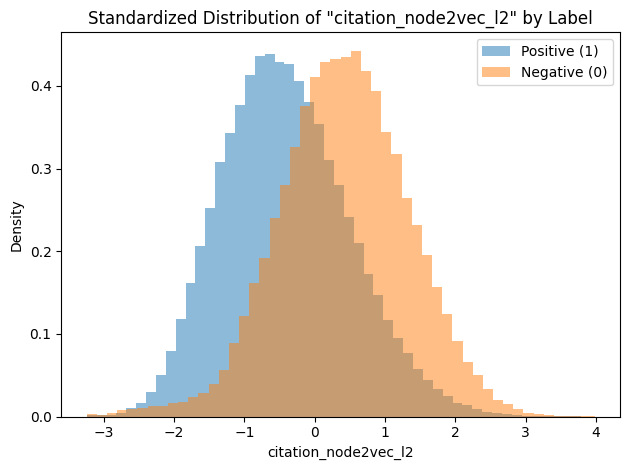

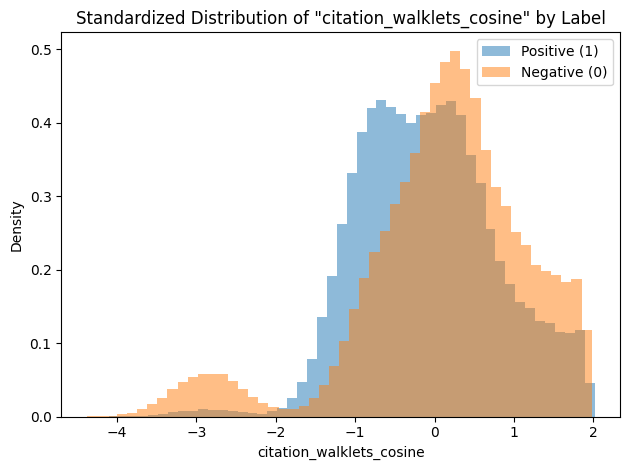

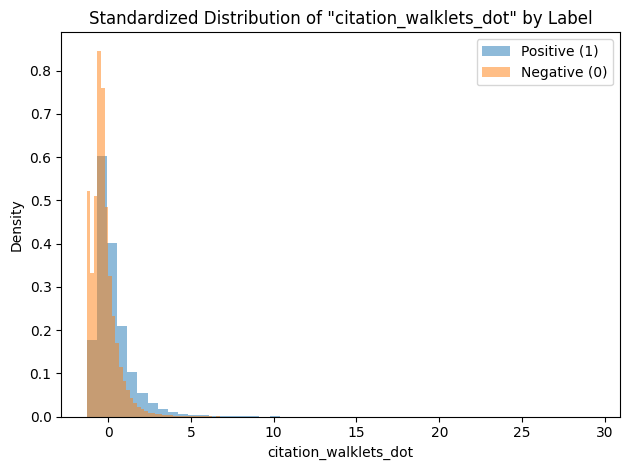

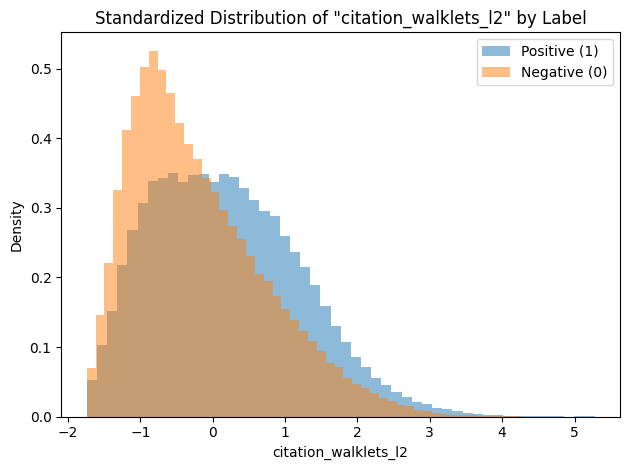

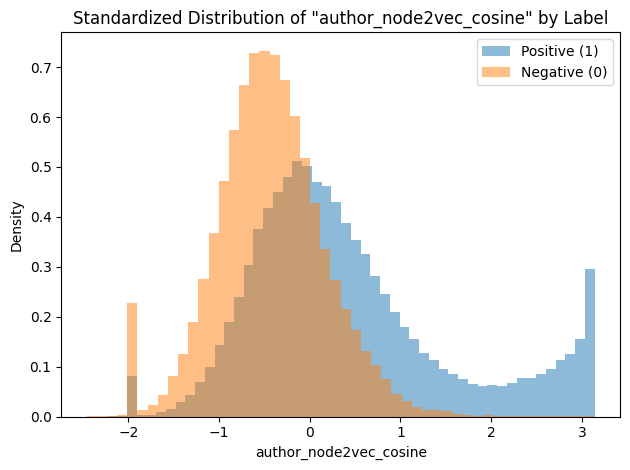

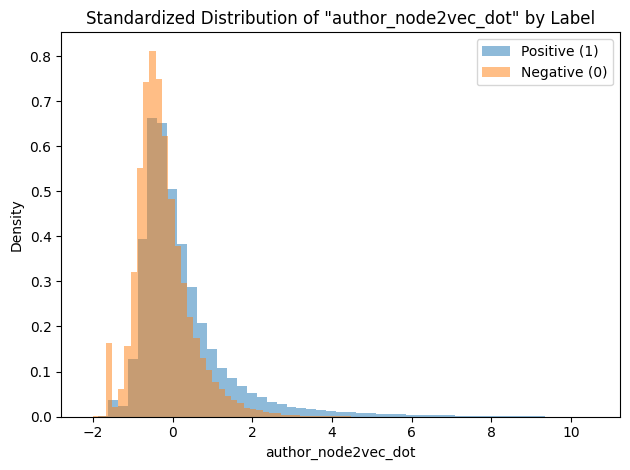

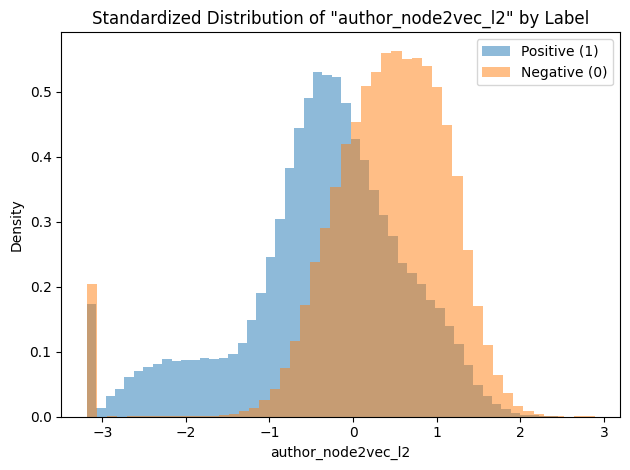

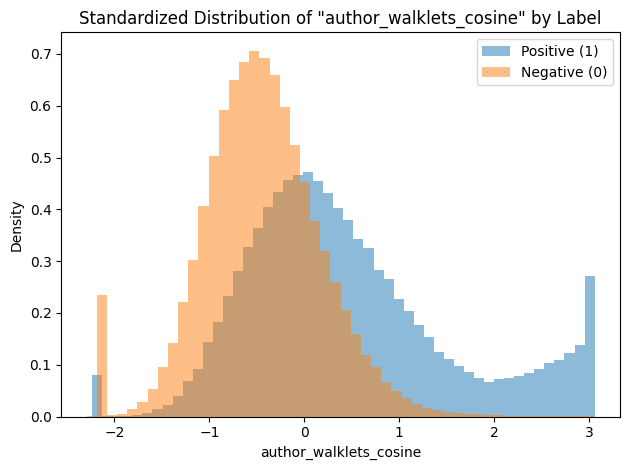

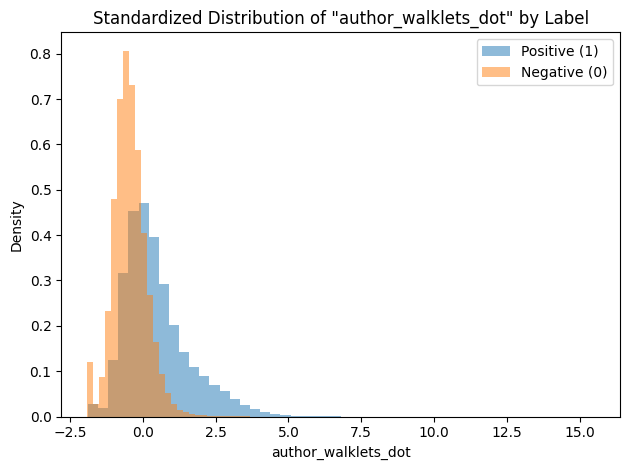

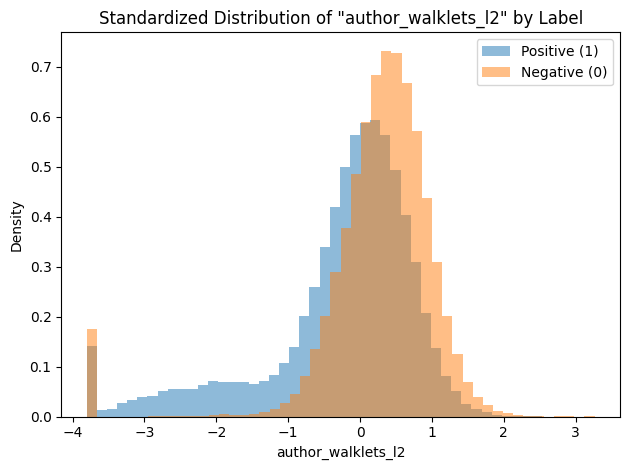

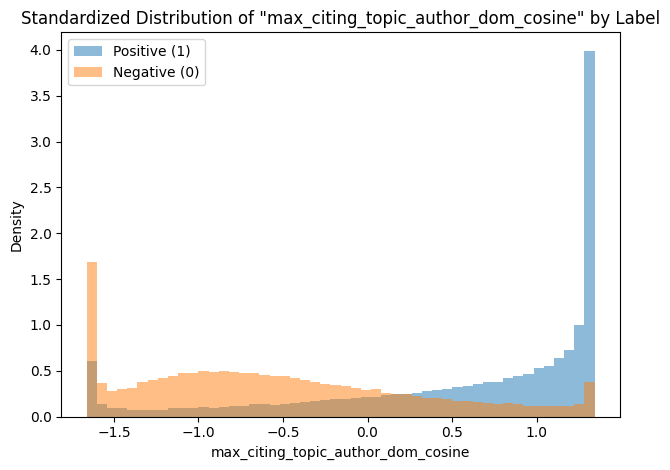

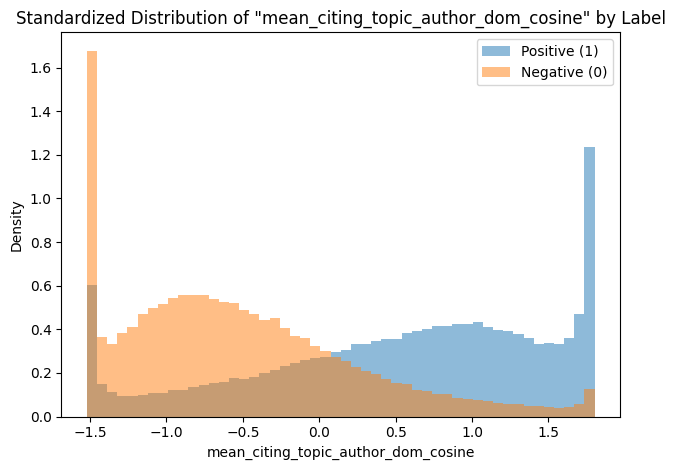

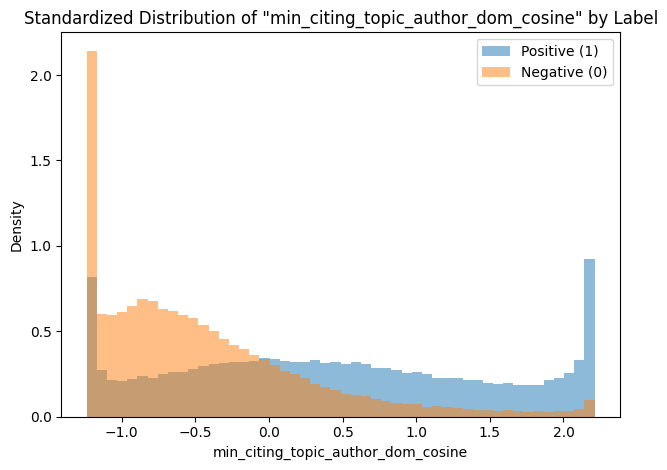

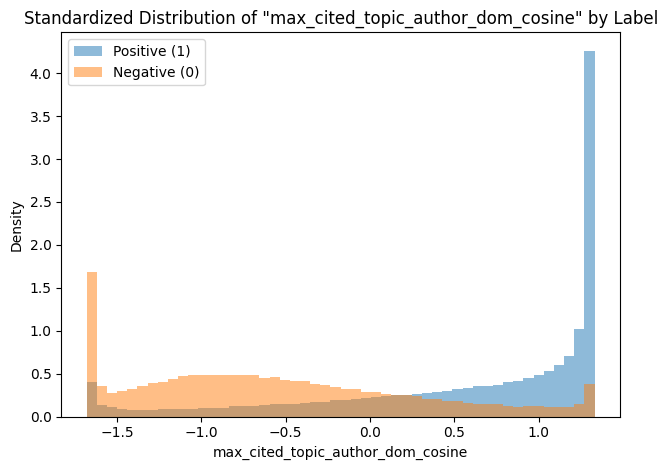

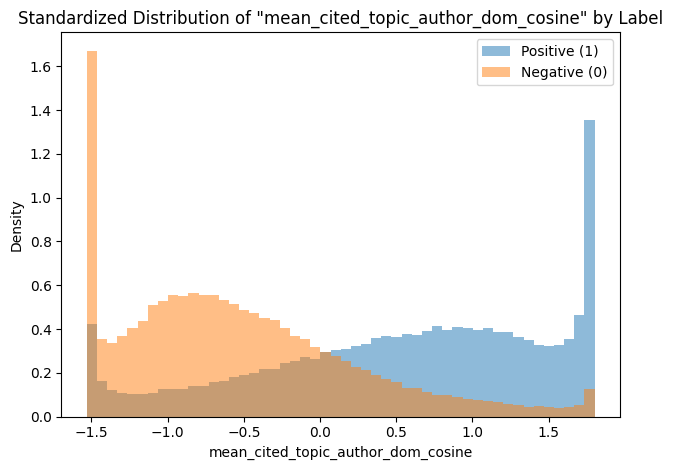

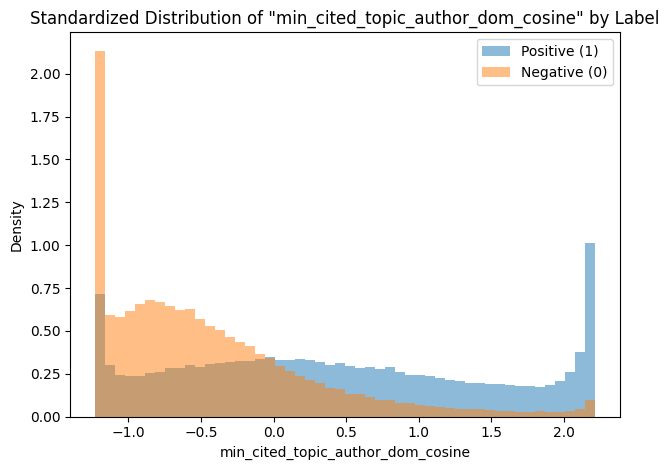

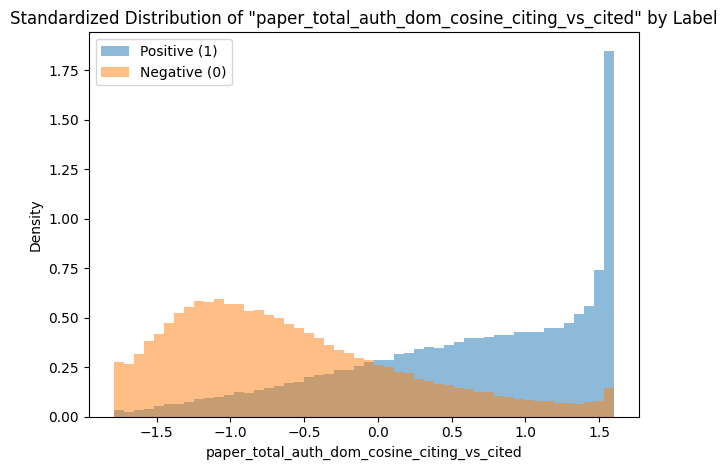

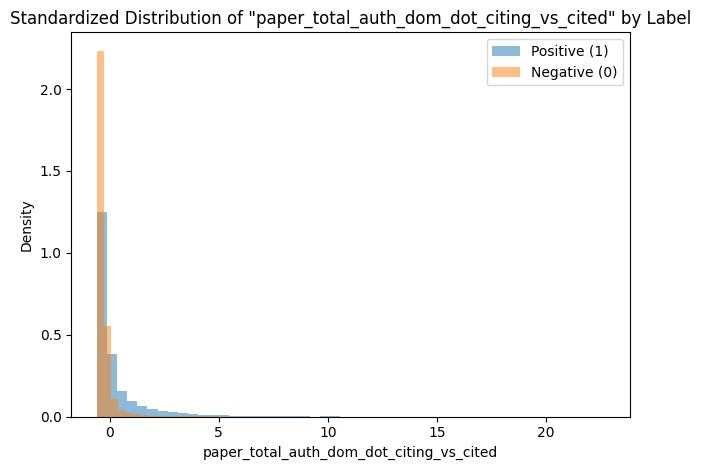

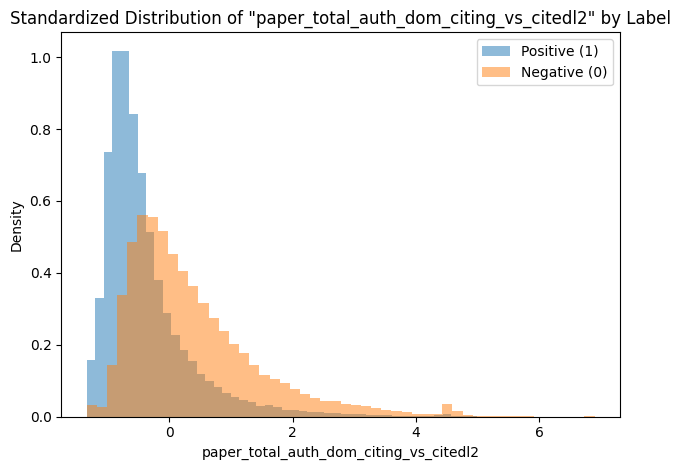

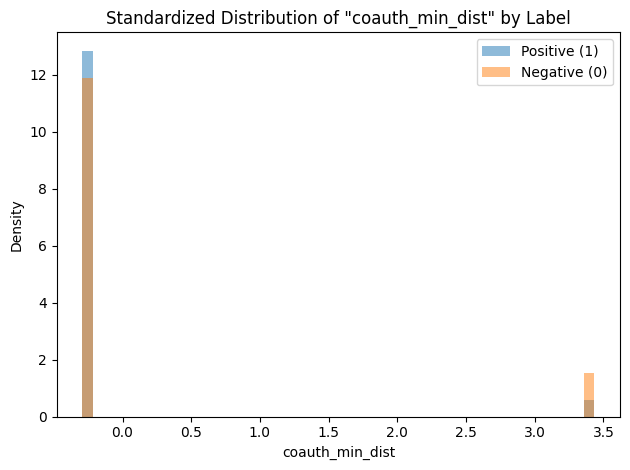

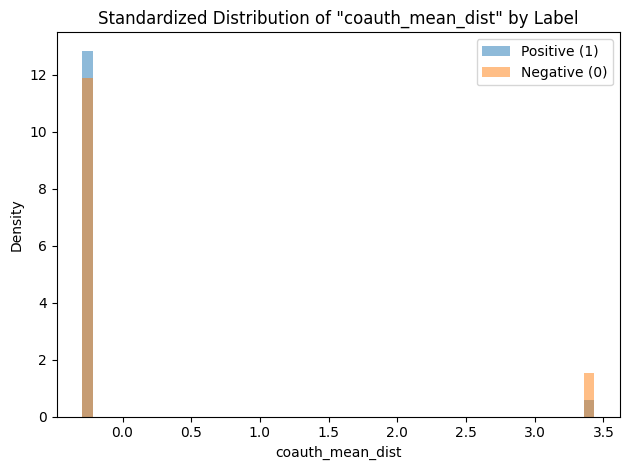

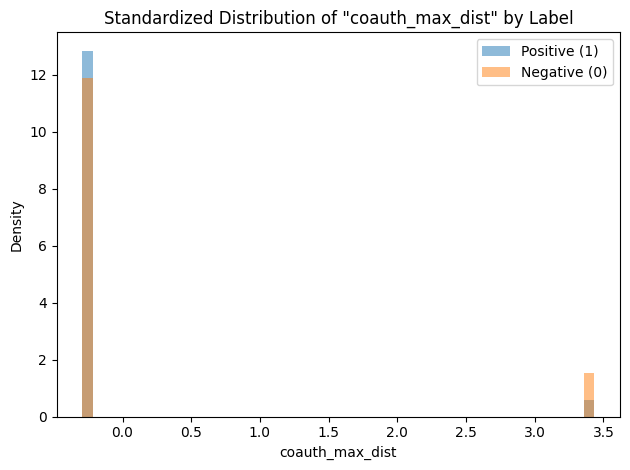

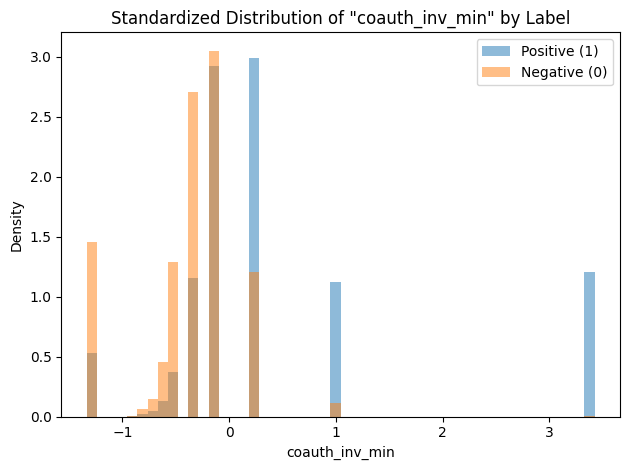

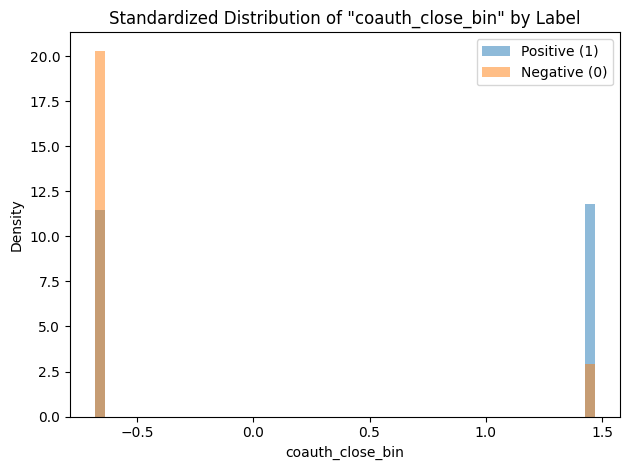

In [4]:
from sklearn.preprocessing import StandardScaler
import pandas as pd
import matplotlib.pyplot as plt

# Path to the scalar features file (contains columns: citing, cited, label, split, and all scalar features)
# old path
#path_feat = r'D:\NLP\tfidf_xgboost\split_train_val\scalar_features_train_val.parquet'

# Updated features
path_feat = r'D:\NLP\data\data_features.parquet'


# 1. Load the scalar features directly (no merge needed)
df = pd.read_parquet(path_feat)

# 2. Filter for the validation split
val = df[df['split'] == 'val']


# Τα ονόματα των feature columns
feature_cols = [c for c in val.columns if c not in ['citing','cited','label','split']]

# Δημιούργησε αντίγραφο, κάνε fit_transform τα features
scaler = StandardScaler()
val_scaled = val.copy()
val_scaled[feature_cols] = scaler.fit_transform(val[feature_cols])

# Πλέον σχεδιάζεις με το val_scaled αντί για το val
for feat in feature_cols:
    plt.figure()
    pos = val_scaled[val_scaled['label']==1][feat].dropna()
    neg = val_scaled[val_scaled['label']==0][feat].dropna()
    plt.hist(pos, bins=50, density=True, alpha=0.5)
    plt.hist(neg, bins=50, density=True, alpha=0.5)
    plt.title(f'Standardized Distribution of "{feat}" by Label')
    plt.xlabel(feat)
    plt.ylabel('Density')
    plt.legend(['Positive (1)','Negative (0)'])
    plt.tight_layout()
    plt.show()


In [12]:
# Undirected Citation graph Node2vec/Walklets with less walk length/hops for more generalization
# (μαλλον εμαθε ολον τον γραφο γι αυτο δεν εχει διαφορα distribution στα undirected με αυτες τις παραμετορυς) 

Processing pairs: 100%|██████████████████████████████████████████████████████| 218391/218391 [01:48<00:00, 2007.01it/s]


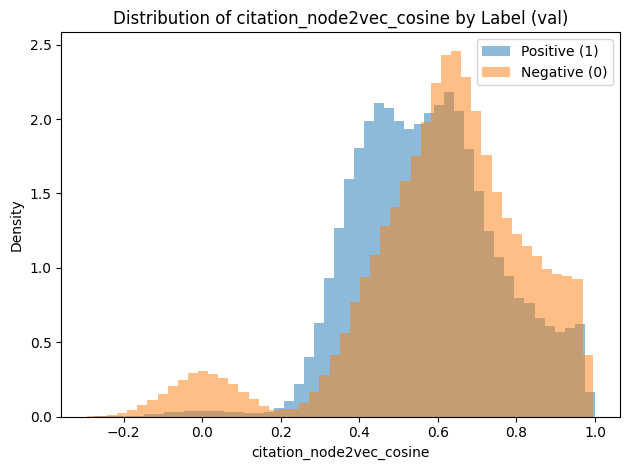

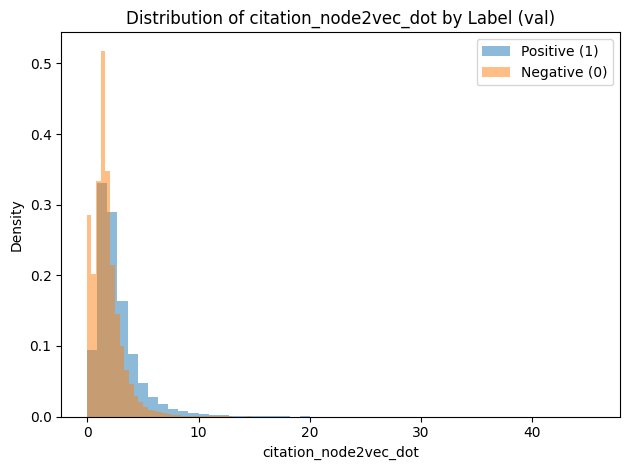

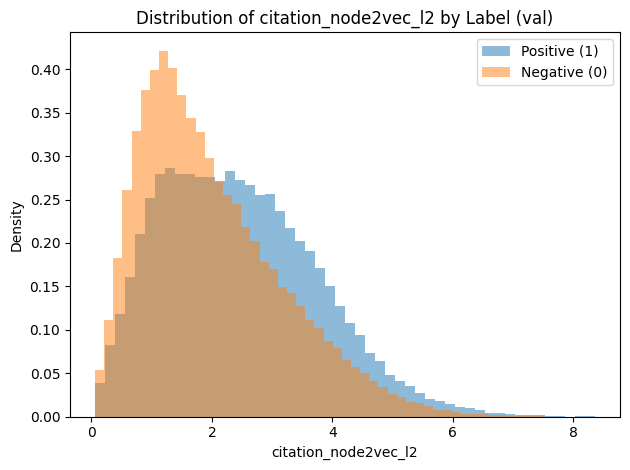

In [16]:
import pandas as pd
import pickle
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics.pairwise import cosine_similarity
from tqdm import tqdm  # Εισαγωγή της βιβλιοθήκης tqdm

# Paths (adjust if needed)
meta_path = r'D:\NLP\tfidf_xgboost\split_train_val\citation_pairs_split_train_val.csv'
n2v_path  = r'D:\NLP\tfidf_xgboost\split_train_val\citation_node2vec_undirected.pkl'
wlk_path  = r'D:\NLP\tfidf_xgboost\split_train_val\citation_walklets_undirected.pkl'

# 1. Load metadata and filter validation set
meta = pd.read_csv(meta_path, usecols=['citing','cited','label','split'])
val = meta[meta['split'] == 'val'].reset_index(drop=True)

# 2. Load embeddings
with open(n2v_path, 'rb') as f:
    n2v_emb = pickle.load(f)
with open(wlk_path, 'rb') as f:
    wlk_emb = pickle.load(f)

# 3. Define safe similarity/distance functions
def safe_cosine(v1, v2):
    if v1 is None or v2 is None:
        return np.nan
    return float(cosine_similarity(v1.reshape(1, -1), v2.reshape(1, -1))[0,0])

def safe_dot(v1, v2):
    if v1 is None or v2 is None:
        return np.nan
    return float(np.dot(v1, v2))

def safe_l2(v1, v2):
    if v1 is None or v2 is None:
        return np.nan
    return float(np.linalg.norm(v1 - v2))

# 4. Compute embedding-based features
features = []
for _, row in tqdm(val.iterrows(), total=len(val), desc="Processing pairs"):  # Προσθήκη tqdm
    u, v = int(row['citing']), int(row['cited'])
    e_u_n2v = n2v_emb.get(u)
    e_v_n2v = n2v_emb.get(v)
    e_u_wlk = wlk_emb.get(u)
    e_v_wlk = wlk_emb.get(v)
    features.append({
        'citation_node2vec_cosine': safe_cosine(e_u_n2v, e_v_n2v),
        'citation_node2vec_dot':    safe_dot(e_u_n2v, e_v_n2v),
        'citation_node2vec_l2':     safe_l2(e_u_n2v, e_v_n2v),
        # 'citation_walklets_cosine': safe_cosine(e_u_wlk, e_v_wlk),
        # 'citation_walklets_dot':    safe_dot(e_u_wlk, e_v_wlk),
        # 'citation_walklets_l2':     safe_l2(e_u_wlk, e_v_wlk),
        'label': row['label']
    })

feat_df = pd.DataFrame(features)

# 5. Plot distributions overlayed by label
emb_feats = [c for c in feat_df.columns if c != 'label']
for feat in emb_feats:
    plt.figure()
    pos = feat_df[feat_df['label'] == 1][feat].dropna()
    neg = feat_df[feat_df['label'] == 0][feat].dropna()
    plt.hist(pos, bins=50, density=True, alpha=0.5)
    plt.hist(neg, bins=50, density=True, alpha=0.5)
    plt.title(f'Distribution of {feat} by Label (val)')
    plt.xlabel(feat)
    plt.ylabel('Density')
    plt.legend(['Positive (1)', 'Negative (0)'])
    plt.tight_layout()
    plt.show()

Processing pairs: 100%|██████████████████████████████████████████████████████| 218391/218391 [01:58<00:00, 1845.71it/s]


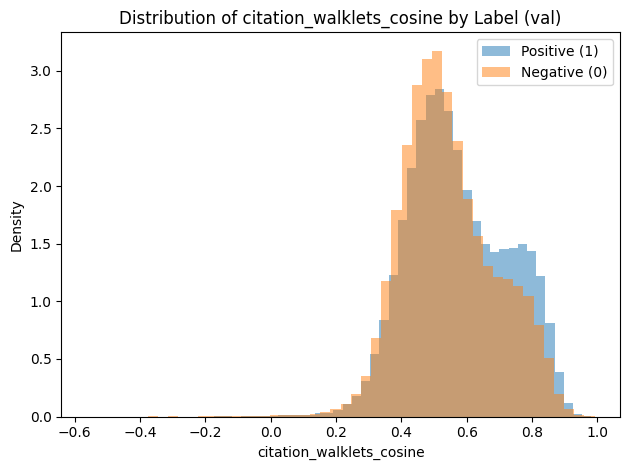

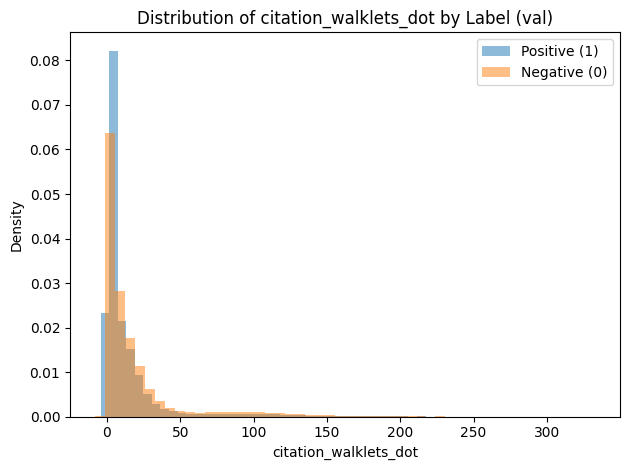

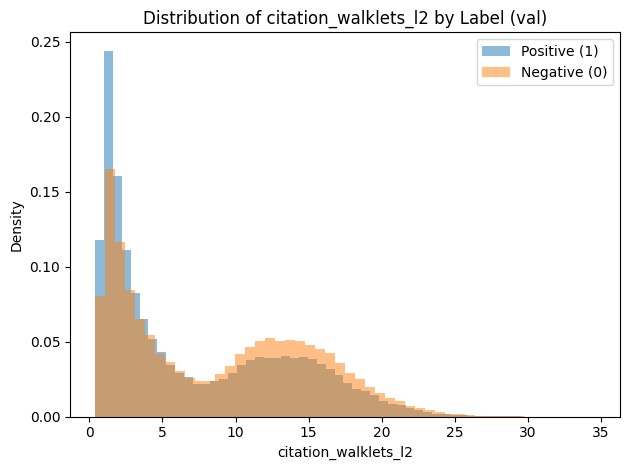

In [4]:
import pandas as pd
import pickle
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics.pairwise import cosine_similarity
from tqdm import tqdm  # Εισαγωγή της βιβλιοθήκης tqdm

# Paths (adjust if needed)
meta_path = r'D:\NLP\tfidf_xgboost\split_train_val\citation_pairs_split_train_val.csv'
#n2v_path  = r'D:\NLP\tfidf_xgboost\split_train_val\citation_node2vec_directed_weighted_q2.pkl'
#n2v_path = "D:/NLP/tfidf_xgboost/split_train_val/citation_node2vec_tuned.pkl"
wlk_path  = 'D:/NLP/tfidf_xgboost/split_train_val/citation_walklets_directed_32_6_20_40.pkl'

# 1. Load metadata and filter validation set
meta = pd.read_csv(meta_path, usecols=['citing','cited','label','split'])
val = meta[meta['split'] == 'val'].reset_index(drop=True)

# 2. Load embeddings
with open(n2v_path, 'rb') as f:
    n2v_emb = pickle.load(f)
    
with open(wlk_path, 'rb') as f:
    wlk_emb = pickle.load(f)

# 3. Define safe similarity/distance functions
def safe_cosine(v1, v2):
    if v1 is None or v2 is None:
        return np.nan
    return float(cosine_similarity(v1.reshape(1, -1), v2.reshape(1, -1))[0,0])

def safe_dot(v1, v2):
    if v1 is None or v2 is None:
        return np.nan
    return float(np.dot(v1, v2))

def safe_l2(v1, v2):
    if v1 is None or v2 is None:
        return np.nan
    return float(np.linalg.norm(v1 - v2))

# 4. Compute embedding-based features
features = []
for _, row in tqdm(val.iterrows(), total=len(val), desc="Processing pairs"):  # Προσθήκη tqdm
    u, v = int(row['citing']), int(row['cited'])
    # e_u_n2v = n2v_emb.get(u)
    # e_v_n2v = n2v_emb.get(v)
    e_u_wlk = wlk_emb.get(u)
    e_v_wlk = wlk_emb.get(v)
    features.append({
        # 'citation_node2vec_cosine': safe_cosine(e_u_n2v, e_v_n2v),
        # 'citation_node2vec_dot':    safe_dot(e_u_n2v, e_v_n2v),
        # 'citation_node2vec_l2':     safe_l2(e_u_n2v, e_v_n2v),
        'citation_walklets_cosine': safe_cosine(e_u_wlk, e_v_wlk),
        'citation_walklets_dot':    safe_dot(e_u_wlk, e_v_wlk),
        'citation_walklets_l2':     safe_l2(e_u_wlk, e_v_wlk),
        'label': row['label']
    })

feat_df = pd.DataFrame(features)

# 5. Plot distributions overlayed by label
emb_feats = [c for c in feat_df.columns if c != 'label']
for feat in emb_feats:
    plt.figure()
    pos = feat_df[feat_df['label'] == 1][feat].dropna()
    neg = feat_df[feat_df['label'] == 0][feat].dropna()
    plt.hist(pos, bins=50, density=True, alpha=0.5)
    plt.hist(neg, bins=50, density=True, alpha=0.5)
    plt.title(f'Distribution of {feat} by Label (val)')
    plt.xlabel(feat)
    plt.ylabel('Density')
    plt.legend(['Positive (1)', 'Negative (0)'])
    plt.tight_layout()
    plt.show()

Processing pairs: 100%|██████████████████████████████████████████████████████| 218391/218391 [01:50<00:00, 1982.32it/s]


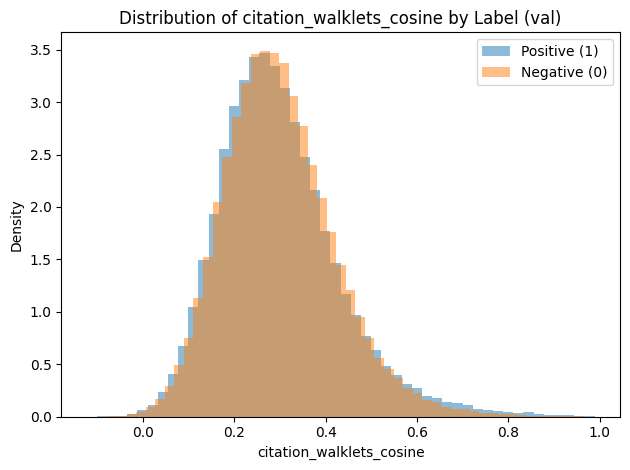

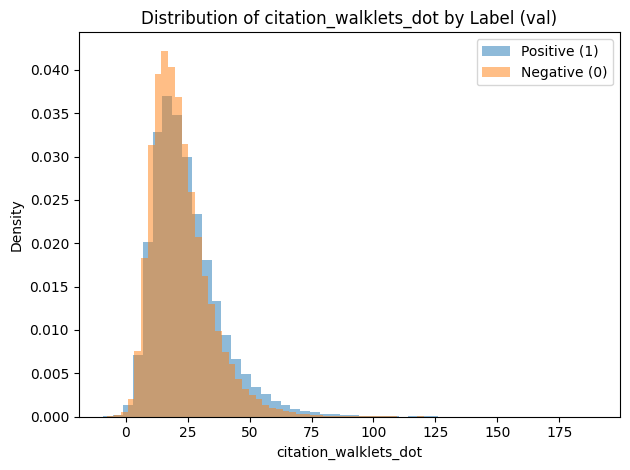

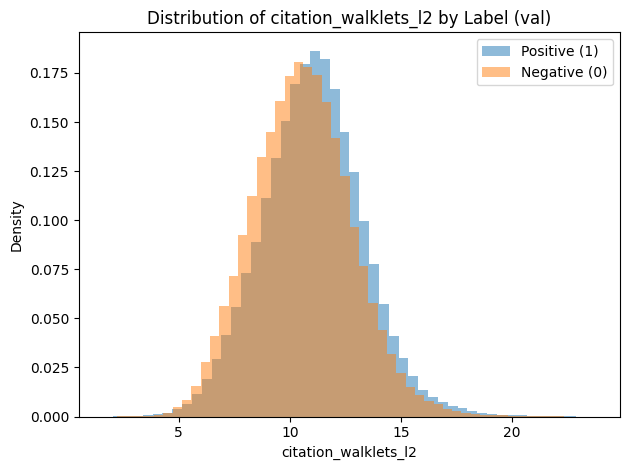

In [17]:
import pandas as pd
import pickle
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics.pairwise import cosine_similarity
from tqdm import tqdm  # Εισαγωγή της βιβλιοθήκης tqdm

# Paths (adjust if needed)
meta_path = r'D:\NLP\tfidf_xgboost\split_train_val\citation_pairs_split_train_val.csv'
#n2v_path  = r'D:\NLP\tfidf_xgboost\split_train_val\citation_node2vec_directed_weighted_q2.pkl'
#n2v_path = "D:/NLP/tfidf_xgboost/split_train_val/citation_node2vec_tuned.pkl"
wlk_path  = 'D:/NLP/tfidf_xgboost/split_train_val/citation_walklets_weighted_3_4.pkl'

# 1. Load metadata and filter validation set
meta = pd.read_csv(meta_path, usecols=['citing','cited','label','split'])
val = meta[meta['split'] == 'val'].reset_index(drop=True)

# 2. Load embeddings
with open(n2v_path, 'rb') as f:
    n2v_emb = pickle.load(f)
    
with open(wlk_path, 'rb') as f:
    wlk_emb = pickle.load(f)

# 3. Define safe similarity/distance functions
def safe_cosine(v1, v2):
    if v1 is None or v2 is None:
        return np.nan
    return float(cosine_similarity(v1.reshape(1, -1), v2.reshape(1, -1))[0,0])

def safe_dot(v1, v2):
    if v1 is None or v2 is None:
        return np.nan
    return float(np.dot(v1, v2))

def safe_l2(v1, v2):
    if v1 is None or v2 is None:
        return np.nan
    return float(np.linalg.norm(v1 - v2))

# 4. Compute embedding-based features
features = []
for _, row in tqdm(val.iterrows(), total=len(val), desc="Processing pairs"):  # Προσθήκη tqdm
    u, v = int(row['citing']), int(row['cited'])
    # e_u_n2v = n2v_emb.get(u)
    # e_v_n2v = n2v_emb.get(v)
    e_u_wlk = wlk_emb.get(u)
    e_v_wlk = wlk_emb.get(v)
    features.append({
        # 'citation_node2vec_cosine': safe_cosine(e_u_n2v, e_v_n2v),
        # 'citation_node2vec_dot':    safe_dot(e_u_n2v, e_v_n2v),
        # 'citation_node2vec_l2':     safe_l2(e_u_n2v, e_v_n2v),
        'citation_walklets_cosine': safe_cosine(e_u_wlk, e_v_wlk),
        'citation_walklets_dot':    safe_dot(e_u_wlk, e_v_wlk),
        'citation_walklets_l2':     safe_l2(e_u_wlk, e_v_wlk),
        'label': row['label']
    })

feat_df = pd.DataFrame(features)

# 5. Plot distributions overlayed by label
emb_feats = [c for c in feat_df.columns if c != 'label']
for feat in emb_feats:
    plt.figure()
    pos = feat_df[feat_df['label'] == 1][feat].dropna()
    neg = feat_df[feat_df['label'] == 0][feat].dropna()
    plt.hist(pos, bins=50, density=True, alpha=0.5)
    plt.hist(neg, bins=50, density=True, alpha=0.5)
    plt.title(f'Distribution of {feat} by Label (val)')
    plt.xlabel(feat)
    plt.ylabel('Density')
    plt.legend(['Positive (1)', 'Negative (0)'])
    plt.tight_layout()
    plt.show()

In [ ]:
# Similarity features only

In [ ]:
# Npstack  only ( concat emebds )

In [ ]:
import pickle
import pandas as pd
import numpy as np
from numpy.linalg import norm
from tqdm.auto import tqdm
from sklearn.decomposition import TruncatedSVD
from sklearn.preprocessing import normalize
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score, accuracy_score, f1_score

base_path = "D:/NLP/tfidf_xgboost"

# 1. Φόρτωση citation pairs
pairs = pd.read_csv(f"{base_path}/split_train_val/citation_pairs_split_train_val.csv")

# 2. Φόρτωση Specter embeddings
with open(f"{base_path}/specter_embeddings.pkl", "rb") as f:
    specter_dict = pickle.load(f)
print("✅ Specter embeddings loaded:", len(specter_dict))

# 3. Φόρτωση abstracts για idx_map
abstracts_df = pd.read_parquet(f"{base_path}/cleaned_abstracts.parquet")
idx_map = dict(zip(abstracts_df.paper_id, range(len(abstracts_df))))
n_papers = len(abstracts_df)
D = 768

# 4. Δημιουργία spec_matrix με tqdm
spec_matrix = np.zeros((n_papers, D), dtype=np.float32)
for pid, vec in tqdm(specter_dict.items(), total=len(specter_dict), desc="Building spec_matrix"):
    idx = idx_map.get(pid)
    if idx is not None:
        spec_matrix[idx] = vec

# 5. Truncated SVD: 768 → 64 διαστάσεις
svd = TruncatedSVD(n_components=64, random_state=42)
spec_reduced = svd.fit_transform(spec_matrix)

# 6. L2-normalize
spec_norm = normalize(spec_reduced, norm='l2', axis=1)

# 7. Συνάρτηση safe cosine
def safe_cos(i, j):
    if i is None or j is None:
        return 0.0
    return float(np.dot(spec_norm[i], spec_norm[j]))

# 8. Map indices
pairs['i'] = pairs['citing'].map(idx_map)
pairs['j'] = pairs['cited'].map(idx_map)

# 9. Υπολογισμός cos με tqdm
cos_list = []
for i, j in tqdm(zip(pairs['i'], pairs['j']), total=len(pairs), desc="Computing cosines"):
    cos_list.append(safe_cos(int(i) if pd.notna(i) else None,
                             int(j) if pd.notna(j) else None))
pairs['cos_specter_reduced'] = cos_list

# καθαρισμός
pairs.drop(columns=['i','j'], inplace=True)

# 10. Split / train / eval
train = pairs[pairs['split']=='train']
val   = pairs[pairs['split']=='val']

X_train = train[['cos_specter_reduced']]
y_train = train['label']
X_val   = val[['cos_specter_reduced']]
y_val   = val['label']

clf = LogisticRegression(solver='lbfgs', max_iter=1000)
clf.fit(X_train, y_train)

y_pred = clf.predict(X_val)
y_prob = clf.predict_proba(X_val)[:,1]

metrics = {
    'roc_auc': roc_auc_score(y_val, y_prob),
    'accuracy': accuracy_score(y_val, y_pred),
    'f1_score': f1_score(y_val, y_pred)
}
print(pd.DataFrame.from_dict(metrics, orient='index', columns=['value']))


In [5]:
import pickle
import pandas as pd
import numpy as np
from tqdm.auto import tqdm
from sklearn.decomposition import TruncatedSVD
from sklearn.preprocessing import normalize
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score, accuracy_score, f1_score

base_path = "D:/NLP/tfidf_xgboost"

# 1. Φόρτωση citation pairs
pairs = pd.read_csv(f"{base_path}/split_train_val/citation_pairs_split_train_val.csv")

# 2. Φόρτωση Specter embeddings
with open(f"{base_path}/specter_embeddings.pkl", "rb") as f:
    specter_dict = pickle.load(f)

# 3. Φόρτωση abstracts για idx_map
abstracts_df = pd.read_parquet(f"{base_path}/cleaned_abstracts.parquet")
idx_map = dict(zip(abstracts_df.paper_id, range(len(abstracts_df))))
n_papers = len(abstracts_df)
D = 768

# 4. Δημιουργία full-spec matrix με tqdm
spec_matrix = np.zeros((n_papers, D), dtype=np.float32)
for pid, vec in tqdm(specter_dict.items(), total=len(specter_dict), desc="Building spec_matrix"):
    idx = idx_map.get(pid)
    if idx is not None:
        spec_matrix[idx] = vec

# 5. Dimensionality reduction: 768 → 64
svd = TruncatedSVD(n_components=128, random_state=42)
spec_reduced = svd.fit_transform(spec_matrix)

# 6. L2-normalize
spec_norm = normalize(spec_reduced, norm='l2', axis=1)

# 7. Map paper_ids to indices
pairs['i'] = pairs['citing'].map(idx_map)
pairs['j'] = pairs['cited'].map(idx_map)

# 8. Compute Hadamard-product features
n_comp = spec_norm.shape[1]
zero_vec = np.zeros(n_comp, dtype=np.float32)

hadamard_feats = []
for i, j in tqdm(zip(pairs['i'], pairs['j']), total=len(pairs), desc="Computing hadamard"):
    if pd.notna(i) and pd.notna(j):
        vi = spec_norm[int(i)]
        vj = spec_norm[int(j)]
        hadamard_feats.append(vi * vj)
    else:
        hadamard_feats.append(zero_vec)
hadamard_feats = np.vstack(hadamard_feats)

pairs.drop(columns=['i','j'], inplace=True)

# 9. Split σε train / val
train_mask = pairs['split'] == 'train'
val_mask   = pairs['split'] == 'val'

X_train = hadamard_feats[train_mask.values]
y_train = pairs.loc[train_mask, 'label']

X_val   = hadamard_feats[val_mask.values]
y_val   = pairs.loc[val_mask, 'label']

# 10. Εκπαίδευση Logistic Regression
clf = LogisticRegression(solver='lbfgs', max_iter=1000)
clf.fit(X_train, y_train)

# 11. Αξιολόγηση
y_pred = clf.predict(X_val)
y_prob = clf.predict_proba(X_val)[:,1]

metrics = {
    'roc_auc': roc_auc_score(y_val, y_prob),
    'accuracy': accuracy_score(y_val, y_pred),
    'f1_score': f1_score(y_val, y_pred)
}
metrics_df = pd.DataFrame.from_dict(metrics, orient='index', columns=['value'])
print(metrics_df)


D:\NLP\gnn_env\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
Computing hadamard: 100%|████████████████████████████████████████████████| 2183910/2183910 [00:06<00:00, 326144.24it/s]


             value
roc_auc   0.936110
accuracy  0.865727
f1_score  0.862814


In [6]:
import pandas as pd
import numpy as np
import scipy.sparse
from tqdm.auto import tqdm
from sklearn.decomposition import TruncatedSVD
from sklearn.preprocessing import normalize
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score, accuracy_score, f1_score

base_path = "D:/NLP/tfidf_xgboost"

# 1. Φόρτωση citation pairs
pairs = pd.read_csv(f"{base_path}/split_train_val/citation_pairs_split_train_val.csv")

# 2. Φόρτωση TF–IDF matrix (fitted προηγουμένως)
tfidf_matrix = scipy.sparse.load_npz(f"{base_path}/tfidf_matrix.npz")
print("🔄 TF–IDF matrix loaded:", tfidf_matrix.shape)

# 3. Φόρτωση abstracts για idx_map
abstracts_df = pd.read_parquet(f"{base_path}/cleaned_abstracts.parquet")
idx_map = dict(zip(abstracts_df.paper_id, range(len(abstracts_df))))
n_papers = len(abstracts_df)

# 4. Truncated SVD: μειώνουμε από dim(tfidf)→64
svd = TruncatedSVD(n_components=128, random_state=42)
# Με tqdm για πρόοδο
tfidf_reduced = svd.fit_transform(tfidf_matrix)

# 5. L2-normalization
tfidf_norm = normalize(tfidf_reduced, norm='l2', axis=1)

# 6. Map paper_ids σε indices
pairs['i'] = pairs['citing'].map(idx_map)
pairs['j'] = pairs['cited'].map(idx_map)

# 7. Compute Hadamard–product features
dim = tfidf_norm.shape[1]
zero_vec = np.zeros(dim, dtype=np.float32)
hadamard_feats = []

for i, j in tqdm(zip(pairs['i'], pairs['j']), total=len(pairs), desc="TF–IDF Hadamard"):
    if pd.notna(i) and pd.notna(j):
        vi = tfidf_norm[int(i)]
        vj = tfidf_norm[int(j)]
        hadamard_feats.append(vi * vj)
    else:
        hadamard_feats.append(zero_vec)

hadamard_feats = np.vstack(hadamard_feats)
pairs.drop(columns=['i','j'], inplace=True)

# 8. Split σε train / val
train_mask = pairs['split'] == 'train'
val_mask   = pairs['split'] == 'val'

X_train = hadamard_feats[train_mask.values]
y_train = pairs.loc[train_mask, 'label']
X_val   = hadamard_feats[val_mask.values]
y_val   = pairs.loc[val_mask, 'label']

# 9. Εκπαίδευση Logistic Regression
clf = LogisticRegression(solver='lbfgs', max_iter=1000)
clf.fit(X_train, y_train)

# 10. Αξιολόγηση
y_pred = clf.predict(X_val)
y_prob = clf.predict_proba(X_val)[:,1]

metrics = {
    'roc_auc': roc_auc_score(y_val, y_prob),
    'accuracy': accuracy_score(y_val, y_pred),
    'f1_score': f1_score(y_val, y_pred)
}
metrics_df = pd.DataFrame.from_dict(metrics, orient='index', columns=['value'])
print(metrics_df)


🔄 TF–IDF matrix loaded: (131250, 10000)


TF–IDF Hadamard: 100%|███████████████████████████████████████████████████| 2183910/2183910 [00:06<00:00, 338388.96it/s]


             value
roc_auc   0.911276
accuracy  0.841711
f1_score  0.834121


In [7]:
import pickle
import pandas as pd
import numpy as np
from tqdm.auto import tqdm
from sklearn.decomposition import TruncatedSVD
from sklearn.preprocessing import normalize
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score, accuracy_score, f1_score

base_path = "D:/NLP/tfidf_xgboost"

# 1. Φόρτωση citation pairs
pairs = pd.read_csv(f"{base_path}/split_train_val/citation_pairs_split_train_val.csv")

# 2. Φόρτωση Specter embeddings
with open(f"{base_path}/specter_embeddings.pkl", "rb") as f:
    specter_dict = pickle.load(f)

# 3. Φόρτωση BERTopic features (topic distributions + entropies)
bertopic_df = pd.read_parquet(f"{base_path}/bertopic_features.parquet")
topic_cols = [c for c in bertopic_df.columns
              if c not in ("paper_id", "bertopic_dominant_topic", "bertopic_topic_entropy")]
# topic distributions as numpy arrays
topic_dist_arrays = {
    pid: row.values
    for pid, row in bertopic_df.set_index("paper_id")[topic_cols].iterrows()
}
# entropies
entropy_dict = dict(zip(bertopic_df.paper_id, bertopic_df.bertopic_topic_entropy))

# 4. Φόρτωση abstracts για idx_map
abstracts_df = pd.read_parquet(f"{base_path}/cleaned_abstracts.parquet")
idx_map = dict(zip(abstracts_df.paper_id, range(len(abstracts_df))))
n_papers = len(abstracts_df)
D = 768

# 5. Build full Specter matrix (n_papers × 768)
spec_matrix = np.zeros((n_papers, D), dtype=np.float32)
for pid, vec in tqdm(specter_dict.items(),
                     total=len(specter_dict),
                     desc="Building spec_matrix"):
    idx = idx_map.get(pid)
    if idx is not None:
        spec_matrix[idx] = vec

# 6. Dimensionality reduction: 768 → 128
svd = TruncatedSVD(n_components=128, random_state=42)
spec_reduced = svd.fit_transform(spec_matrix)

# 7. L2-normalize Specter embeddings
spec_norm = normalize(spec_reduced, norm='l2', axis=1)

# 8. Map pair indices
pairs['i'] = pairs['citing'].map(idx_map)
pairs['j'] = pairs['cited'].map(idx_map)

# 9. Compute Hadamard–product Specter features
n_comp = spec_norm.shape[1]
zero_vec = np.zeros(n_comp, dtype=np.float32)
hadamard_feats = []
for i, j in tqdm(zip(pairs['i'], pairs['j']),
                 total=len(pairs),
                 desc="Computing Specter hadamard"):
    if pd.notna(i) and pd.notna(j):
        vi = spec_norm[int(i)]
        vj = spec_norm[int(j)]
        hadamard_feats.append(vi * vj)
    else:
        hadamard_feats.append(zero_vec)
hadamard_feats = np.vstack(hadamard_feats)

# 10. Compute BERTopic cosine similarity feature
def safe_cosine(a, b):
    if a is None or b is None:
        return 0.0
    na, nb = np.linalg.norm(a), np.linalg.norm(b)
    if na == 0 or nb == 0:
        return 0.0
    return float(np.dot(a, b) / (na * nb))

cos_bertopic = []
for c_id, d_id in tqdm(zip(pairs['citing'], pairs['cited']),
                       total=len(pairs),
                       desc="Computing bertopic cosine"):
    a = topic_dist_arrays.get(c_id)
    b = topic_dist_arrays.get(d_id)
    cos_bertopic.append(safe_cosine(a, b))
cos_bertopic = np.array(cos_bertopic, dtype=np.float32)

# 11. Map entropies for citing & cited
entropy_citing = pairs['citing'].map(entropy_dict).fillna(0.0).values.reshape(-1, 1)
entropy_cited  = pairs['cited'].map(entropy_dict).fillna(0.0).values.reshape(-1, 1)

# 12. Drop helper cols
pairs.drop(columns=['i','j'], inplace=True)

# 13. Assemble final feature matrix:
#     [hadamard_feats | cos_bertopic | entropy_citing | entropy_cited]
X_all = np.hstack([
    hadamard_feats,
    cos_bertopic.reshape(-1, 1),
    entropy_citing,
    entropy_cited
])

# 14. Split σε train / val
train_mask = pairs['split'] == 'train'
val_mask   = pairs['split'] == 'val'

X_train = X_all[train_mask.values]
y_train = pairs.loc[train_mask, 'label'].values

X_val   = X_all[val_mask.values]
y_val   = pairs.loc[val_mask, 'label'].values

# 15. Εκπαίδευση & Αξιολόγηση Logistic Regression
clf = LogisticRegression(solver='lbfgs', max_iter=1000)
clf.fit(X_train, y_train)

y_pred = clf.predict(X_val)
y_prob = clf.predict_proba(X_val)[:, 1]

metrics = {
    'roc_auc': roc_auc_score(y_val, y_prob),
    'accuracy': accuracy_score(y_val, y_pred),
    'f1_score': f1_score(y_val, y_pred)
}
metrics_df = pd.DataFrame.from_dict(metrics, orient='index', columns=['value'])
print(metrics_df)


Computing bertopic cosine: 100%|██████████████████████████████████████████| 2183910/2183910 [00:33<00:00, 65199.70it/s]


             value
roc_auc   0.934482
accuracy  0.862522
f1_score  0.858923


In [8]:
import pickle
import pandas as pd
import numpy as np
from tqdm.auto import tqdm
from sklearn.decomposition import TruncatedSVD
from sklearn.preprocessing import normalize
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import roc_auc_score, accuracy_score, f1_score

base_path = "D:/NLP/tfidf_xgboost"

# … (όλα τα προηγούμενα βήματα είναι ίδια με πριν, μέχρι την προετοιμασία X_train, y_train, X_val, y_val)

# 15. Εκπαίδευση & Αξιολόγηση με MLPClassifier αντί για LogisticRegression
clf = MLPClassifier(
    hidden_layer_sizes=(100,),   # ένα κρυφό επίπεδο με 100 νευρώνες
    activation='relu',
    solver='adam',
    max_iter=200,
    random_state=42,
    early_stopping=True,
    n_iter_no_change=10,
    verbose=True
)

clf.fit(X_train, y_train)

y_pred = clf.predict(X_val)
y_prob = clf.predict_proba(X_val)[:, 1]

metrics = {
    'roc_auc': roc_auc_score(y_val, y_prob),
    'accuracy': accuracy_score(y_val, y_pred),
    'f1_score': f1_score(y_val, y_pred)
}
metrics_df = pd.DataFrame.from_dict(metrics, orient='index', columns=['value'])
print(metrics_df)


Iteration 1, loss = 0.32237088
Validation score: 0.880286
Iteration 2, loss = 0.28172063
Validation score: 0.887256
Iteration 3, loss = 0.26882149
Validation score: 0.888350
Iteration 4, loss = 0.26362171
Validation score: 0.890706
Iteration 5, loss = 0.26150526
Validation score: 0.889953


D:\NLP\gnn_env\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:698: UserWarning: Training interrupted by user.
  warnings.warn("Training interrupted by user.")


             value
roc_auc   0.958205
accuracy  0.890481
f1_score  0.887856


In [9]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import TensorDataset, DataLoader
from sklearn.metrics import roc_auc_score, accuracy_score, f1_score

# 1. Device
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print("Using device:", device)

# 2. Prepare datasets & loaders
# assume X_train, y_train, X_val, y_val are numpy arrays of shape (N, D)
X_train_t = torch.from_numpy(X_train).float()
y_train_t = torch.from_numpy(y_train).float().unsqueeze(1)
X_val_t   = torch.from_numpy(X_val).float()
y_val_t   = torch.from_numpy(y_val).float().unsqueeze(1)

train_ds = TensorDataset(X_train_t, y_train_t)
val_ds   = TensorDataset(X_val_t,   y_val_t)

batch_size = 1024
train_loader = DataLoader(train_ds, batch_size=batch_size, shuffle=True, num_workers=2)
val_loader   = DataLoader(val_ds,   batch_size=batch_size, shuffle=False, num_workers=2)

# 3. Define deeper MLP
class DeepMLP(nn.Module):
    def __init__(self, input_dim):
        super().__init__()
        self.net = nn.Sequential(
            nn.Linear(input_dim, 256),
            nn.ReLU(),
            nn.Dropout(0.3),
            nn.Linear(256, 128),
            nn.ReLU(),
            nn.Dropout(0.3),
            nn.Linear(128, 64),
            nn.ReLU(),
            nn.Dropout(0.2),
            nn.Linear(64, 1)
        )
    def forward(self, x):
        return self.net(x)

model = DeepMLP(X_train.shape[1]).to(device)

# 4. Loss & optimizer
criterion = nn.BCEWithLogitsLoss()
optimizer = optim.Adam(model.parameters(), lr=1e-3, weight_decay=1e-5)

# 5. Training loop
num_epochs = 20
for epoch in range(1, num_epochs+1):
    model.train()
    total_loss = 0.0
    for xb, yb in train_loader:
        xb, yb = xb.to(device), yb.to(device)
        optimizer.zero_grad()
        logits = model(xb)
        loss = criterion(logits, yb)
        loss.backward()
        optimizer.step()
        total_loss += loss.item() * xb.size(0)
    avg_loss = total_loss / len(train_loader.dataset)
    
    # Validation
    model.eval()
    all_probs, all_preds, all_targets = [], [], []
    with torch.no_grad():
        for xb, yb in val_loader:
            xb = xb.to(device)
            logits = model(xb)
            probs = torch.sigmoid(logits).cpu().numpy().flatten()
            preds = (probs >= 0.5).astype(int)
            all_probs.extend(probs.tolist())
            all_preds.extend(preds.tolist())
            all_targets.extend(yb.numpy().flatten().tolist())
    
    roc = roc_auc_score(all_targets, all_probs)
    acc = accuracy_score(all_targets, all_preds)
    f1  = f1_score(all_targets, all_preds)
    print(f"Epoch {epoch:2d} | train_loss: {avg_loss:.4f} | val ROC-AUC: {roc:.4f}, acc: {acc:.4f}, f1: {f1:.4f}")


Using device: cuda
Epoch  1 | train_loss: 0.3099 | val ROC-AUC: 0.9566, acc: 0.8862, f1: 0.8864
Epoch  2 | train_loss: 0.2697 | val ROC-AUC: 0.9580, acc: 0.8902, f1: 0.8860
Epoch  3 | train_loss: 0.2670 | val ROC-AUC: 0.9581, acc: 0.8890, f1: 0.8881
Epoch  4 | train_loss: 0.2657 | val ROC-AUC: 0.9585, acc: 0.8900, f1: 0.8881
Epoch  5 | train_loss: 0.2655 | val ROC-AUC: 0.9583, acc: 0.8899, f1: 0.8857
Epoch  6 | train_loss: 0.2651 | val ROC-AUC: 0.9586, acc: 0.8904, f1: 0.8883
Epoch  7 | train_loss: 0.2650 | val ROC-AUC: 0.9581, acc: 0.8894, f1: 0.8842
Epoch  8 | train_loss: 0.2647 | val ROC-AUC: 0.9583, acc: 0.8894, f1: 0.8878
Epoch  9 | train_loss: 0.2644 | val ROC-AUC: 0.9581, acc: 0.8884, f1: 0.8821
Epoch 10 | train_loss: 0.2646 | val ROC-AUC: 0.9589, acc: 0.8909, f1: 0.8881
Epoch 11 | train_loss: 0.2641 | val ROC-AUC: 0.9587, acc: 0.8906, f1: 0.8868
Epoch 12 | train_loss: 0.2641 | val ROC-AUC: 0.9589, acc: 0.8900, f1: 0.8886


KeyboardInterrupt: 

In [10]:
# Walklets ONLY as embeds